In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v10.csv", delimiter=";")
dataset.head()

,time,datacenter_id,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,...,frequency_range,voltage_range,ram,available_ram,bw,available_bw,storage,available_storage,power_model,vms
0,300.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
1,600.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
2,900.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
3,1200.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
4,1500.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."


## Energy Consumption

### Max Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure at max can consume 63.96 kW per hour


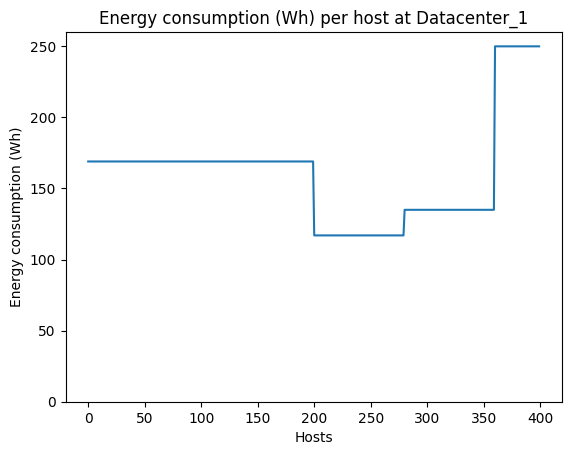

The datacenter 'Datacenter_2' current computing infrastructure at max can consume 26.73 kW per hour


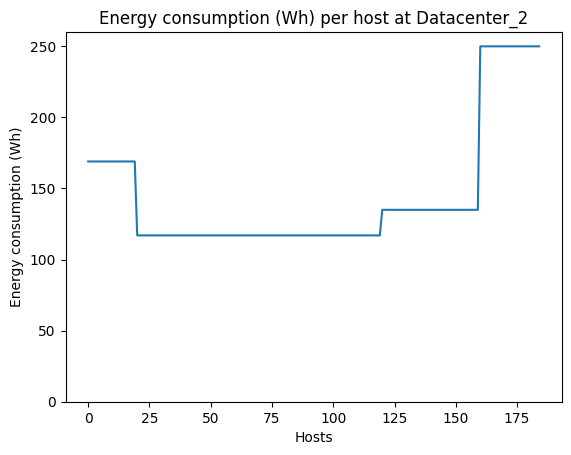

The datacenter 'Datacenter_3' current computing infrastructure at max can consume 28.38 kW per hour


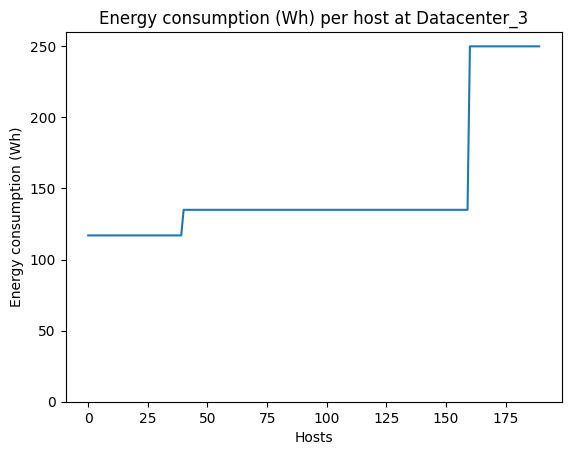

The datacenter 'Datacenter_4' current computing infrastructure at max can consume 42.25 kW per hour


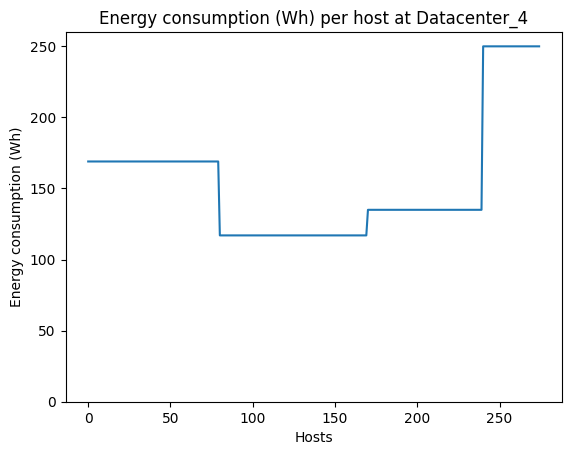

The cloud providers current computing infrastructure at max can consume 161.32 kW per hour


In [60]:
labels= np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_host = np.array([])
max_power_per_datacenter = np.array([])

datacenter_total_pes = np.array([])
datacenter_total_mips = np.array([])
datacenter_total_ram = np.array([])
datacenter_total_bw = np.array([])
datacenter_total_storage = np.array([])

datacenter_hosts = np.array([])
for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_host_per_datacenter = np.array([])
    hosts = 0
    
    pes = 0
    mips = 0
    ram = 0
    bw = 0
    storage = 0
    
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        # max_power_per_datacenter += float(power_model[-2])
        max_power_per_host = np.append(max_power_per_host, float(power_model[-2]))
        max_power_per_host_per_datacenter = np.append(max_power_per_host_per_datacenter, float(power_model[-2]))
        hosts += 1
        
        pes += sample['number_of_pes']
        mips += sample['mips']
        ram += sample['ram']
        bw += sample['bw']
        storage += sample['storage']
    
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_host_per_datacenter))
    max_power += np.sum(max_power_per_host_per_datacenter)
    datacenter_hosts = np.append(datacenter_hosts, hosts)
    
    datacenter_total_pes = np.append(datacenter_total_pes, pes)
    datacenter_total_mips = np.append(datacenter_total_mips, mips)
    datacenter_total_ram = np.append(datacenter_total_ram, ram)
    datacenter_total_bw = np.append(datacenter_total_bw, bw)
    datacenter_total_storage = np.append(datacenter_total_storage, storage)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure at max can consume {(np.sum(max_power_per_host_per_datacenter) * 1)/1000} kW per hour")
    plt.plot(np.arange(0, len(max_power_per_host_per_datacenter)), (max_power_per_host_per_datacenter*1))
    plt.ylim((0, max(max_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)/1000} kW per hour")

### Current Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure is consuming 54.91926502273205 kilo joules per second


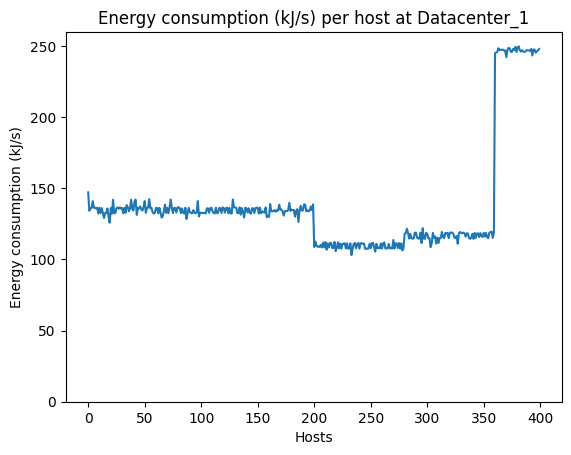

The datacenter 'Datacenter_2' current computing infrastructure is consuming 24.546409025291634 kilo joules per second


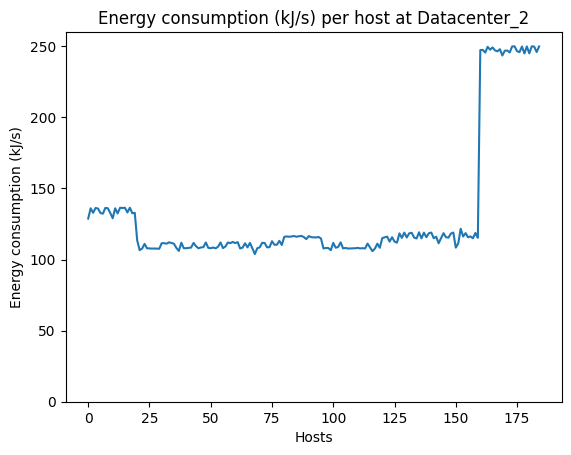

The datacenter 'Datacenter_3' current computing infrastructure is consuming 25.847404431297512 kilo joules per second


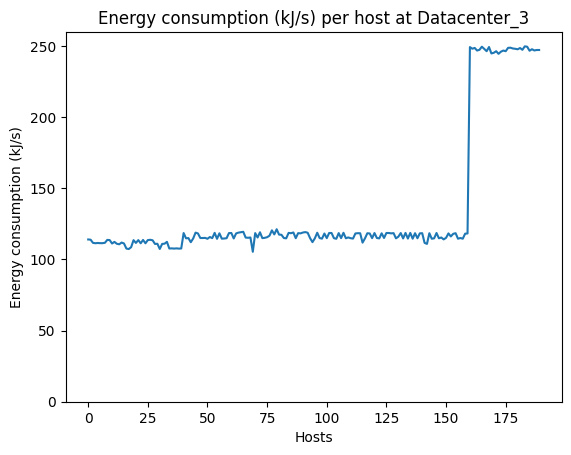

The datacenter 'Datacenter_4' current computing infrastructure is consuming 19.155724899518997 kilo joules per second


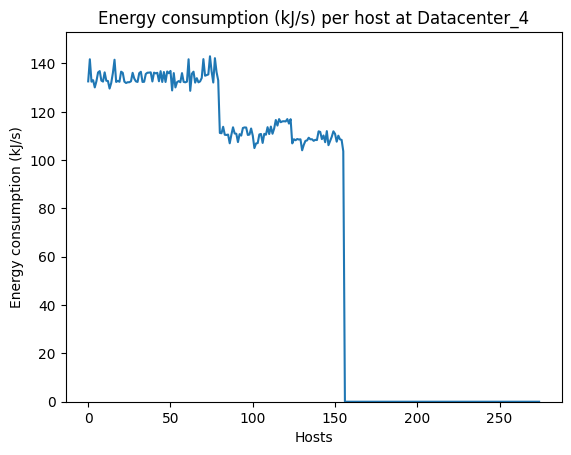

The cloud providers current computing infrastructure at max can consume 124.46880337884019 kilo joules per second


In [61]:
labels= np.unique(dataset['datacenter_name'])
power = 0
power_per_host = np.array([])
datacenter_current_power = np.array([])

datacenter_current_hosts_powered_on = np.array([])
datacenter_current_hosts_powered_off = np.array([])

datacenter_current_available_pes = np.array([])
datacenter_current_available_mips = np.array([])
datacenter_current_available_ram = np.array([])
datacenter_current_available_bw = np.array([])
datacenter_current_available_storage = np.array([])

for i in range(len(labels)):
    # datacenter_current_power = 0
    power_per_host_per_datacenter = np.array([])
    hosts_power_on = 0
    hosts_power_off = 0
    
    pes = 0
    mips = 0
    ram = 0
    bw = 0
    storage = 0
    
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        if sample['active'] == False:
            power_per_host = np.append(power_per_host, 0)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, 0)
            hosts_power_off += 1
        elif utilization % 0.1 == 0:
            host_power = power_model[utilization * 10]
            # datacenter_current_power += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
            hosts_power_on += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
        else:
            utilization_floor = int(math.floor(utilization * 10))
            utilization_ceil = int(math.ceil(utilization * 10))
            power_floor = float(power_model[utilization_floor])
            power_ceil = float(power_model[utilization_ceil])
            
            diff = (power_ceil - power_floor) / 10
            host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
            
            # datacenter_current_power += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
            hosts_power_on += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
    
    datacenter_current_power = np.append(datacenter_current_power, np.sum(power_per_host_per_datacenter))
    power += np.sum(power_per_host_per_datacenter)
    
    datacenter_current_hosts_powered_on = np.append(datacenter_current_hosts_powered_on, hosts_power_on)
    datacenter_current_hosts_powered_off = np.append(datacenter_current_hosts_powered_off, hosts_power_off)
    
    datacenter_current_available_pes = np.append(datacenter_current_available_pes, pes)
    datacenter_current_available_mips = np.append(datacenter_current_available_mips, mips)
    datacenter_current_available_ram = np.append(datacenter_current_available_ram, ram)
    datacenter_current_available_bw = np.append(datacenter_current_available_bw, bw)
    datacenter_current_available_storage = np.append(datacenter_current_available_storage, storage)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(np.sum(power_per_host_per_datacenter) * 1)/1000} kilo joules per second")
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Energy consumption (kJ/s) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(datacenter_current_power) * 1)/1000} kilo joules per second")

### Reducing energy consumption by reducing the available CPU utilization

Note this would be done through approaches such as DVFS or Dynamic Voltage Frequency Scaling to reduce the available number of instructions per second by adjusting the CPU clock speed.

The datacenter 'Datacenter_1' current computing infrastructure is consuming 54.38359473074698 kilo joules per second.
With 15 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


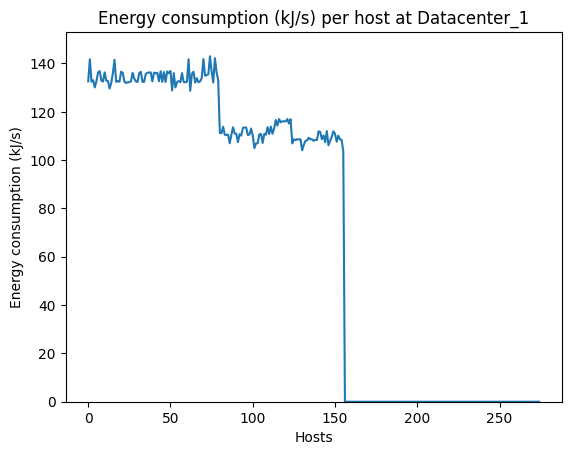

The datacenter 'Datacenter_2' current computing infrastructure is consuming 24.222572287334202 kilo joules per second.
With 9 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


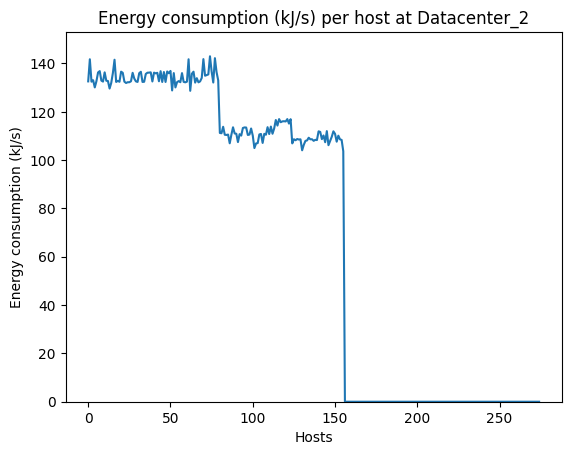

The datacenter 'Datacenter_3' current computing infrastructure is consuming 25.595318135942847 kilo joules per second.
With 7 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


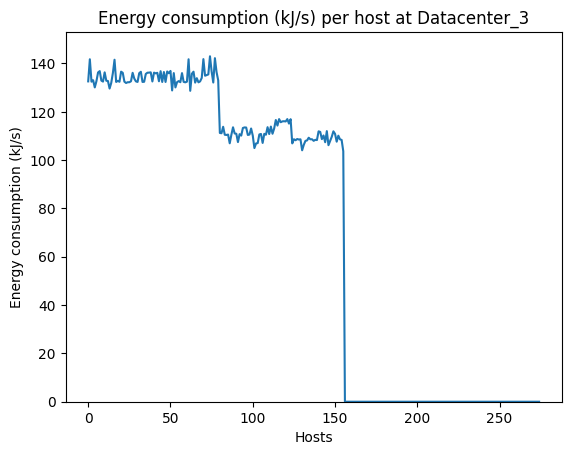

The datacenter 'Datacenter_4' current computing infrastructure is consuming 19.155724899519 kilo joules per second.
With 0 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


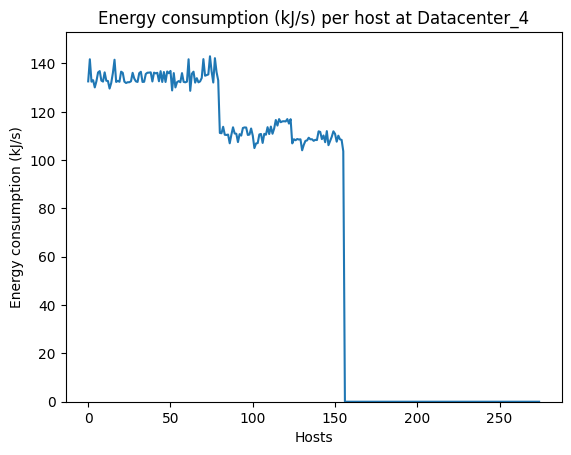

The cloud providers current computing infrastructure at max can consume 123.35721005354307 kilo joules per second.
With 31.0 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


In [62]:
labels= np.unique(dataset['datacenter_name'])

datacenter_dvfs_hosts_power = np.array([])
datacenter_dvfs_hosts_powered_on = np.array([])
datacenter_dvfs_hosts_powered_off = np.array([])

datacenter_dvfs_cpu_cores = np.array([])
datacenter_dvfs_cpu_cores_altered = np.array([])
datacenter_dvfs_mode_changed = np.array([])

datacenter_dvfs_available_pes = np.array([])
datacenter_dvfs_available_mips = np.array([])
datacenter_dvfs_available_ram = np.array([])
datacenter_dvfs_available_bw = np.array([])
datacenter_dvfs_available_storage = np.array([])

datacenter_dvfs_available_power_aware_pes = np.array([])
datacenter_dvfs_available_power_aware_mips = np.array([])
datacenter_dvfs_available_power_aware_ram = np.array([])
datacenter_dvfs_available_power_aware_bw = np.array([])
datacenter_dvfs_available_power_aware_storage = np.array([])

for i in range(len(labels)):
    # power_per_datacenter = 0
    power = 0
    power_per_datacenter = np.array([])
    hosts_power_on = 0
    hosts_power_off = 0
    
    dvfs_mode_changed = 0
    dvfs_mode_altered = 0
    cpu_cores = 0
    
    pes = 0
    mips = 0
    ram = 0
    bw = 0
    storage = 0
    
    pes_power_aware = 0
    mips_power_aware = 0
    ram_power_aware = 0
    bw_power_aware = 0
    storage_power_aware = 0
    
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        
        power_model = sample['power_model'].split(",")
        if sample['active'] == False:
                hosts_power_off += 1
        elif sample['dvfs_available']:
            hosts_power_on += 1
            frequency_range = sample['frequency_range'].split(",")
            voltage_range = sample['voltage_range'].split(",")
            cores = sample['utilization_per_pe'].split(":")
            mips_used = float(sample['mips']) - float(sample['available_mips'])
            
            frequency_index_per_core_indexes = []
            # print("Used MIPS per core:", cores)
            # print("Used MIPS:", mips_used)
            
            for core_index, mips_per_core in enumerate(cores):
                if mips_per_core != "":
                    cpu_cores += 1
                    mips_per_core_info = mips_per_core.split(",")
                    core_mips_used = float(mips_per_core_info[0]) - float(mips_per_core_info[1])
                    selected_frequency_index = 0
                    obj = {
                        "core_index": core_index,
                        "frequency_index": selected_frequency_index
                    }
                    
                    changed = False
                    for frequency_index, frequency in enumerate(frequency_range):
                        if frequency != "" and float(frequency) >= core_mips_used:
                            if frequency_index != 0:
                                dvfs_mode_changed += 1
                                
                                if changed == False:
                                    dvfs_mode_altered += 1
                                    changed = True
                            
                            selected_frequency_index = frequency_index
                    obj['frequency_index'] = selected_frequency_index
                    frequency_index_per_core_indexes.append(obj)
            
            
            utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
            if utilization % 0.1 == 0:
                host_power = float(power_model[utilization * 10])
                
                # P = c * v^2 * f
                host_cpu_capacitance = host_power / ((float(voltage_range[0]))**2 * float(frequency_range[0]))
                dvfs_host_power = host_cpu_capacitance * (float(voltage_range[selected_frequency_index]))**2 * float(frequency_range[selected_frequency_index])
                
                
                # power += host_power
                power += dvfs_host_power
                power_per_datacenter = np.append(power_per_datacenter, dvfs_host_power)
                
                pes += sample['available_pes']
                pes_power_aware += sample['available_pes']
                # mips += sample['available_mips']
                
                new_total_mips = 0
                for core in frequency_index_per_core_indexes:
                    new_total_mips += float(frequency_range[core['frequency_index']])
                    
                mips += new_total_mips - mips_used
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                mips_power_aware += new_total_mips - mips_used
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
            else:
                utilization_floor = int(math.floor(utilization * 10))
                utilization_ceil = int(math.ceil(utilization * 10))
                power_floor = float(power_model[utilization_floor])
                power_ceil = float(power_model[utilization_ceil])
                
                diff = (power_ceil - power_floor) / 10
                host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
                
                # P = c * v^2 * f
                host_cpu_capacitance = host_power / ((float(voltage_range[0]))**2 * float(frequency_range[0]))
                dvfs_host_power = host_cpu_capacitance * (float(voltage_range[selected_frequency_index]))**2 * float(frequency_range[selected_frequency_index])
                
                # power += host_power
                power += dvfs_host_power
                power_per_datacenter = np.append(power_per_datacenter, dvfs_host_power)
                
                pes += sample['available_pes']
                pes_power_aware += sample['available_pes']
                # mips += sample['available_mips']
                new_total_mips = 0
                for core in frequency_index_per_core_indexes:
                    new_total_mips += float(frequency_range[core['frequency_index']])
                    
                mips += new_total_mips - mips_used
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
        else:
            utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
            hosts_power_on += 1
            
            if utilization % 0.1 == 0:
                host_power = power_model[utilization * 10]
                hosts_power_on += 1
                power += host_power
                power_per_datacenter = np.append(power_per_datacenter, host_power)
                
                pes += sample['available_pes']
                mips += sample['available_mips']
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                pes_power_aware += sample['available_pes']
                mips_power_aware += sample['available_mips']
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
            else:
                utilization_floor = int(math.floor(utilization * 10))
                utilization_ceil = int(math.ceil(utilization * 10))
                power_floor = float(power_model[utilization_floor])
                power_ceil = float(power_model[utilization_ceil])
                
                diff = (power_ceil - power_floor) / 10
                host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
                
                power += host_power
                power_per_datacenter = np.append(power_per_datacenter, host_power)
                
                pes += sample['available_pes']
                mips += sample['available_mips']
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                pes_power_aware += sample['available_pes']
                mips_power_aware += sample['available_mips']
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
    
    datacenter_dvfs_cpu_cores = np.append(datacenter_dvfs_cpu_cores, cpu_cores)
    datacenter_dvfs_mode_changed = np.append(datacenter_dvfs_mode_changed, dvfs_mode_changed)
    datacenter_dvfs_cpu_cores_altered = np.append(datacenter_dvfs_cpu_cores_altered, dvfs_mode_altered)
    datacenter_dvfs_hosts_power = np.append(datacenter_dvfs_hosts_power, power)
    datacenter_dvfs_hosts_powered_on = np.append(datacenter_dvfs_hosts_powered_on, hosts_power_on)
    datacenter_dvfs_hosts_powered_off = np.append(datacenter_dvfs_hosts_powered_off, hosts_power_off)
    
    datacenter_dvfs_available_pes = np.append(datacenter_dvfs_available_pes, pes)
    datacenter_dvfs_available_mips = np.append(datacenter_dvfs_available_mips, mips)
    datacenter_dvfs_available_ram = np.append(datacenter_dvfs_available_ram, ram)
    datacenter_dvfs_available_bw = np.append(datacenter_dvfs_available_bw, bw)
    datacenter_dvfs_available_storage = np.append(datacenter_dvfs_available_storage, storage)
    
    datacenter_dvfs_available_power_aware_pes = np.append(datacenter_dvfs_available_power_aware_pes, pes_power_aware)
    datacenter_dvfs_available_power_aware_mips = np.append(datacenter_dvfs_available_power_aware_mips, mips_power_aware)
    datacenter_dvfs_available_power_aware_ram = np.append(datacenter_dvfs_available_power_aware_ram, ram_power_aware)
    datacenter_dvfs_available_power_aware_bw = np.append(datacenter_dvfs_available_power_aware_bw, bw_power_aware)
    datacenter_dvfs_available_power_aware_storage = np.append(datacenter_dvfs_available_power_aware_storage, storage_power_aware)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(np.sum(power_per_datacenter) * 1)/1000} kilo joules per second.")
    print(f"With {dvfs_mode_changed} hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.")
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Energy consumption (kJ/s) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(datacenter_dvfs_hosts_power) * 1)/1000} kilo joules per second.")
print(f"With {np.sum(datacenter_dvfs_mode_changed)} hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.")

### Reducing the energy consumption by powering down active hosts 

Note! here host that are not utilized are assumed to be powered off to reduce to illustrate the energy efficiency of powering off inactive servers 

The datacenter 'Datacenter_1' current computing infrastructure is consuming 54.91926502273205 kilo watts per hour


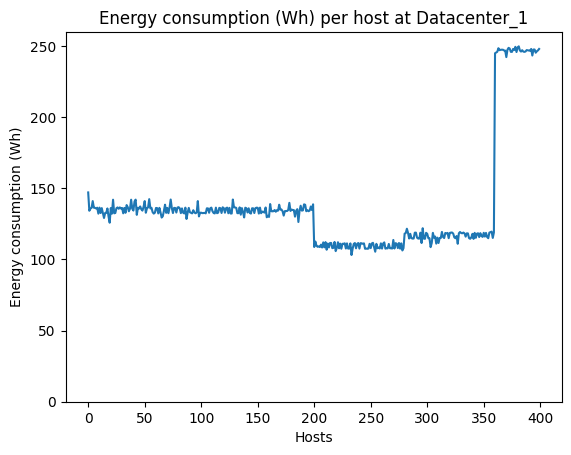

The datacenter 'Datacenter_2' current computing infrastructure is consuming 24.546409025291634 kilo watts per hour


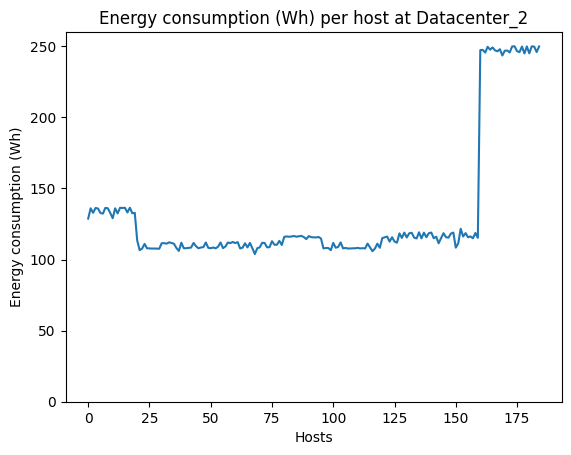

The datacenter 'Datacenter_3' current computing infrastructure is consuming 25.847404431297512 kilo watts per hour


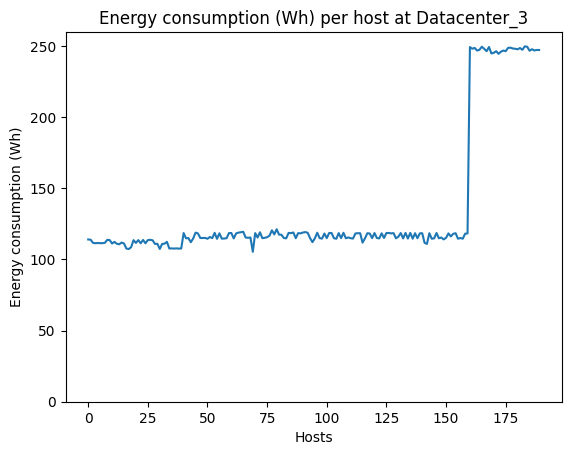

The datacenter 'Datacenter_4' current computing infrastructure is consuming 19.155724899518997 kilo watts per hour


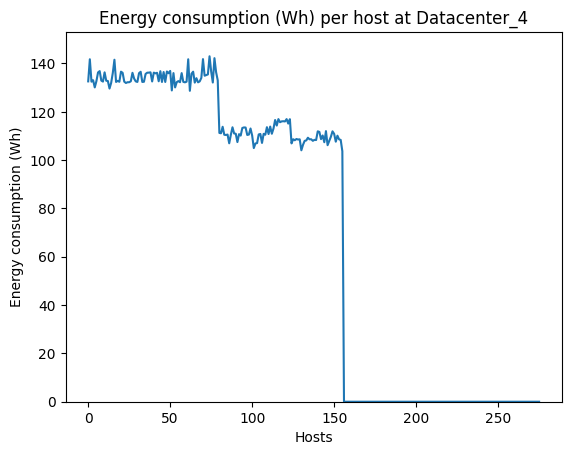

The cloud providers current computing infrastructure at max can consume 124.46880337884019 kilo watts per hour


In [63]:
labels= np.unique(dataset['datacenter_name'])
min_host_power = 0
min_host_power_per_host = np.array([])
min_host_power_per_datacenter = np.array([])

datacenter_hosts_powered_on = np.array([])
datacenter_hosts_powered_off = np.array([])

datacenter_power_down_hosts_available_pes = np.array([])
datacenter_power_down_hosts_available_mips = np.array([])
datacenter_power_down_hosts_available_ram = np.array([])
datacenter_power_down_hosts_available_bw = np.array([])
datacenter_power_down_hosts_available_storage = np.array([])

datacenter_power_down_hosts_available_power_aware_pes = np.array([])
datacenter_power_down_hosts_available_power_aware_mips = np.array([])
datacenter_power_down_hosts_available_power_aware_ram = np.array([])
datacenter_power_down_hosts_available_power_aware_bw = np.array([])
datacenter_power_down_hosts_available_power_aware_storage = np.array([])

for i in range(len(labels)):
    # min_host_power_per_datacenter = 0
    min_host_power_per_host_per_datacenter = np.array([])
    hosts_power_on = 0
    hosts_power_off = 0
    
    pes = 0
    mips = 0
    ram = 0
    bw = 0
    storage = 0
    
    pes_power_aware = 0
    mips_power_aware = 0
    ram_power_aware = 0
    bw_power_aware = 0
    storage_power_aware = 0
    
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        min_host_utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        
        if sample['active'] == False or len(sample['vms'].split(":")) == 0 or sample['available_mips'] == sample['mips']:
            min_host_host_power = 0
            # min_host_power_per_datacenter += host_power
            min_host_power_per_host = np.append(min_host_power_per_host, host_power)
            min_host_power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, min_host_host_power)
            hosts_power_off += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
        elif min_host_utilization % 0.1 == 0:
            min_host_host_power = power_model[min_host_utilization * 10]
            # min_host_power_per_datacenter += min_host_host_power
            min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
            min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
            hosts_power_on += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
            
            pes_power_aware += sample['available_pes']
            mips_power_aware += sample['available_mips']
            ram_power_aware += sample['available_ram']
            bw_power_aware += sample['available_bw']
            storage_power_aware += sample['available_storage']
        else:
            min_host_utilization_floor = int(math.floor(min_host_utilization * 10))
            min_host_utilization_ceil = int(math.ceil(min_host_utilization * 10))
            min_host_power_floor = float(power_model[min_host_utilization_floor])
            min_host_power_ceil = float(power_model[min_host_utilization_ceil])
            
            min_host_diff = (min_host_power_ceil - min_host_power_floor) / 10
            min_host_host_power = min_host_power_floor + min_host_diff * (min_host_utilization - min_host_utilization_floor / 10) * 100
            
            # min_host_power_per_datacenter += min_host_host_power
            min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
            min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
            hosts_power_on += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
            
            pes_power_aware += sample['available_pes']
            mips_power_aware += sample['available_mips']
            ram_power_aware += sample['available_ram']
            bw_power_aware += sample['available_bw']
            storage_power_aware += sample['available_storage']
    min_host_power_per_datacenter = np.append(min_host_power_per_datacenter, np.sum(min_host_power_per_host_per_datacenter))
    min_host_power += np.sum(min_host_power_per_host_per_datacenter)
    
    datacenter_hosts_powered_on = np.append(datacenter_hosts_powered_on, hosts_power_on)
    datacenter_hosts_powered_off = np.append(datacenter_hosts_powered_off, hosts_power_off)
    
    datacenter_power_down_hosts_available_pes = np.append(datacenter_power_down_hosts_available_pes, pes)
    datacenter_power_down_hosts_available_mips = np.append(datacenter_power_down_hosts_available_mips, mips)
    datacenter_power_down_hosts_available_ram = np.append(datacenter_power_down_hosts_available_ram, ram)
    datacenter_power_down_hosts_available_bw = np.append(datacenter_power_down_hosts_available_bw, bw)
    datacenter_power_down_hosts_available_storage = np.append(datacenter_power_down_hosts_available_storage, storage)
    
    datacenter_power_down_hosts_available_power_aware_pes = np.append(datacenter_power_down_hosts_available_power_aware_pes, pes_power_aware)
    datacenter_power_down_hosts_available_power_aware_mips = np.append(datacenter_power_down_hosts_available_power_aware_mips, mips_power_aware)
    datacenter_power_down_hosts_available_power_aware_ram = np.append(datacenter_power_down_hosts_available_power_aware_ram, ram_power_aware)
    datacenter_power_down_hosts_available_power_aware_bw = np.append(datacenter_power_down_hosts_available_power_aware_bw, bw_power_aware)
    datacenter_power_down_hosts_available_power_aware_storage = np.append(datacenter_power_down_hosts_available_power_aware_storage, storage_power_aware)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(np.sum(min_host_power_per_host_per_datacenter) * 1)/1000} kilo watts per hour")
    plt.plot(np.arange(0, len(min_host_power_per_host_per_datacenter)), (min_host_power_per_host_per_datacenter*1))
    plt.ylim((0, max(min_host_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(min_host_power_per_datacenter) * 1)/1000} kilo watts per hour")

### Compare

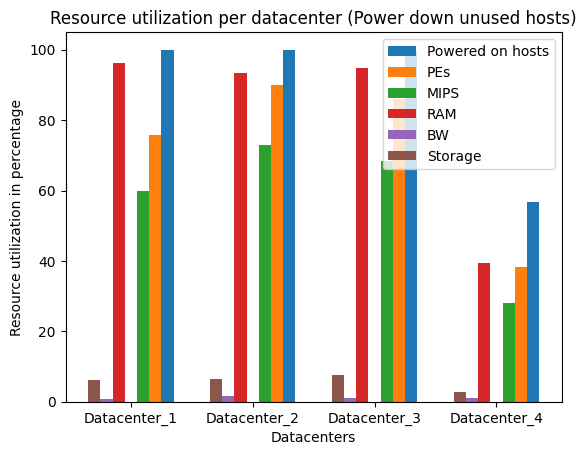

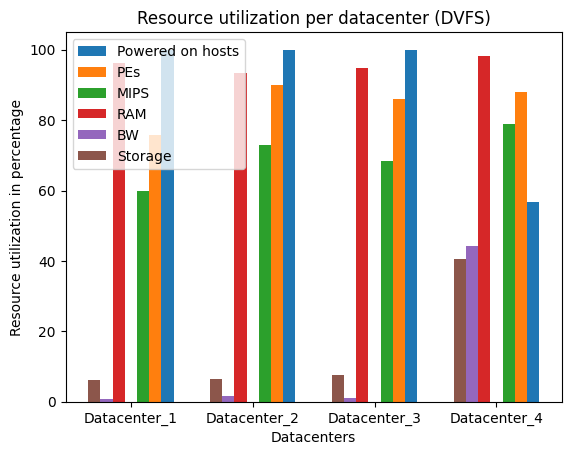

In [64]:
x = np.arange(len(labels))
datacenter_used_power_down_hosts_pes = np.subtract(datacenter_total_pes, datacenter_power_down_hosts_available_pes)
datacenter_used_power_down_hosts_mips = np.subtract(datacenter_total_mips, datacenter_power_down_hosts_available_mips)
datacenter_used_power_down_hosts_ram = np.subtract(datacenter_total_ram, datacenter_power_down_hosts_available_ram)
datacenter_used_power_down_hosts_bw = np.subtract(datacenter_total_bw, datacenter_power_down_hosts_available_bw)
datacenter_used_power_down_hosts_storage = np.subtract(datacenter_total_storage, datacenter_power_down_hosts_available_storage)

bar_width = 0.2
plt.bar(x + bar_width + bar_width / 2, np.divide(datacenter_hosts_powered_on, datacenter_hosts)*100, bar_width/2, label="Powered on hosts")
plt.bar(x + bar_width, np.divide(datacenter_used_power_down_hosts_pes, datacenter_total_pes)*100, bar_width/2, label="PEs")
plt.bar(x + bar_width / 2, np.divide(datacenter_used_power_down_hosts_mips, datacenter_total_mips)*100, bar_width/2, label="MIPS")
plt.bar(x - bar_width / 2, np.divide(datacenter_used_power_down_hosts_ram, datacenter_total_ram)*100, bar_width/2, label="RAM")
plt.bar(x - bar_width, np.divide(datacenter_used_power_down_hosts_bw, datacenter_total_bw)*100, bar_width/2, label="BW")
plt.bar(x - bar_width - bar_width / 2, np.divide(datacenter_used_power_down_hosts_storage, datacenter_total_storage)*100, bar_width/2, label="Storage")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter (Power down unused hosts)")
plt.legend()
plt.show()

x = np.arange(len(labels))
datacenter_used_dvfs_pes = np.subtract(datacenter_total_pes, datacenter_dvfs_available_pes)
datacenter_used_dvfs_mips = np.subtract(datacenter_total_mips, datacenter_dvfs_available_mips)
datacenter_used_dvfs_ram = np.subtract(datacenter_total_ram, datacenter_dvfs_available_ram)
datacenter_used_dvfs_bw = np.subtract(datacenter_total_bw, datacenter_dvfs_available_bw)
datacenter_used_dvfs_storage = np.subtract(datacenter_total_storage, datacenter_dvfs_available_storage)

bar_width = 0.2
plt.bar(x + bar_width + bar_width / 2, np.divide(datacenter_hosts_powered_on, datacenter_hosts)*100, bar_width/2, label="Powered on hosts")
plt.bar(x + bar_width, np.divide(datacenter_used_dvfs_pes, datacenter_total_pes)*100, bar_width/2, label="PEs")
plt.bar(x + bar_width / 2, np.divide(datacenter_used_dvfs_mips, datacenter_total_mips)*100, bar_width/2, label="MIPS")
plt.bar(x - bar_width / 2, np.divide(datacenter_used_dvfs_ram, datacenter_total_ram)*100, bar_width/2, label="RAM")
plt.bar(x - bar_width, np.divide(datacenter_used_dvfs_bw, datacenter_total_bw)*100, bar_width/2, label="BW")
plt.bar(x - bar_width - bar_width / 2, np.divide(datacenter_used_dvfs_storage, datacenter_total_storage)*100, bar_width/2, label="Storage")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter (DVFS)")
plt.legend()
plt.show()

Saved energy consumption:
- Powering down hosts 0.0kJ/s
- DVFS 1.1115933252971217kJ/s


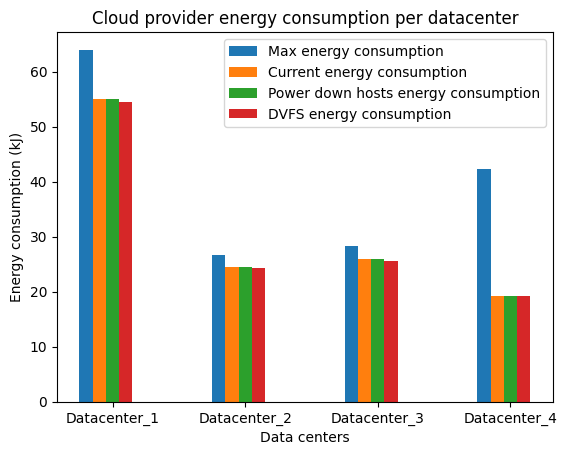

In [65]:
labels = np.unique(dataset['datacenter_name'])
print(f"Saved energy consumption:")
print(f"- Powering down hosts {((np.sum(datacenter_current_power) * 1)/1000) - ((np.sum(min_host_power_per_datacenter) * 1)/1000)}kJ/s")
print(f"- DVFS {(np.sum(datacenter_current_power) * 1)/1000 - (np.sum(datacenter_dvfs_hosts_power) * 1)/1000}kJ/s")
# print(f"- powering down host and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kW/s")

x = np.arange(len(labels))

bar_width = 0.1
plt.bar(x - 0.2, (max_power_per_datacenter * 1) / 1000, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (datacenter_current_power * 1) / 1000, width=bar_width, label="Current energy consumption")
plt.bar(x, (min_host_power_per_datacenter * 1) / 1000, width=bar_width, label="Power down hosts energy consumption")
plt.bar(x + 0.1, (datacenter_dvfs_hosts_power * 1) / 1000, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down hosts and DVFS energy consumption")
plt.xticks(np.arange(len(x)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

In [66]:
print("Powering down hosts:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_hosts_powered_on)} could be are powered on and {np.sum(datacenter_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_power_down_hosts_pes)} are used. (percent: {((np.sum(datacenter_used_power_down_hosts_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_power_down_hosts_mips)} are used. (percent: {((np.sum(datacenter_used_power_down_hosts_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_power_down_hosts_ram)} are used. (percent: {((np.sum(datacenter_used_power_down_hosts_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_power_down_hosts_bw)} are used. (percent: {((np.sum(datacenter_used_power_down_hosts_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_power_down_hosts_storage)} are used. (percent: {((np.sum(datacenter_used_power_down_hosts_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("DVFS:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_dvfs_hosts_powered_on)} could be are powered on and {np.sum(datacenter_dvfs_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_dvfs_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_dvfs_cpu_cores)} available cpu cores from hosts with DVFS available {np.sum(datacenter_dvfs_cpu_cores_altered)} had their configuration altered, with the total configuration changes being {np.sum(datacenter_dvfs_mode_changed)}. (percent: {(np.sum(datacenter_dvfs_cpu_cores_altered)/np.sum(datacenter_dvfs_cpu_cores))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_dvfs_pes)} are used. (percent: {((np.sum(datacenter_used_dvfs_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_dvfs_mips)} are used. (percent: {((np.sum(datacenter_used_dvfs_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_dvfs_ram)} are used. (percent: {((np.sum(datacenter_used_dvfs_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_dvfs_bw)} are used. (percent: {((np.sum(datacenter_used_dvfs_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_dvfs_storage)} are used. (percent: {((np.sum(datacenter_used_dvfs_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("Compared to:")
datacenter_used_current_pes = np.subtract(datacenter_total_pes, datacenter_current_available_pes)
datacenter_used_current_mips = np.subtract(datacenter_total_mips, datacenter_current_available_mips)
datacenter_used_current_ram = np.subtract(datacenter_total_ram, datacenter_current_available_ram)
datacenter_used_current_bw = np.subtract(datacenter_total_bw, datacenter_current_available_bw)
datacenter_used_current_storage = np.subtract(datacenter_total_storage, datacenter_current_available_storage)
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_current_hosts_powered_on)} could be are powered on and {np.sum(datacenter_current_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_current_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_current_pes)} are used. (percent: {((np.sum(datacenter_used_current_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_current_mips)} are used. (percent: {((np.sum(datacenter_used_current_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_current_ram)} are used. (percent: {((np.sum(datacenter_used_current_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_current_bw)} are used. (percent: {((np.sum(datacenter_used_current_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_current_storage)} are used. (percent: {((np.sum(datacenter_used_current_storage))/np.sum(datacenter_total_storage))*100}%)")

Powering down hosts:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1662.0 are used. (percent: 70.42372881355932%)
Out of the 5954400.0 available MIPS 3289525.4666677765 are used. (percent: 55.2452886381126%)
Out of the 5760000.0 available RAM 4633587.0 are used. (percent: 80.44421874999999%)
Out of the 10500000.0 available bandwidth 113862.0 are used. (percent: 1.0844%)
Out of the 153260000.0 available Storage 8634000.0 are used. (percent: 5.633563878376615%)

DVFS:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 380.0 available cpu cores from hosts with DVFS available 30.0 had their configuration altered, with the total configuration changes being 31.0. (percent: 7.894736842105263%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Out of the 595440

In [67]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Powering down hosts:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_hosts_powered_on[index]} could be are powered on and {datacenter_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_power_down_hosts_pes[index]} are used. (percent: {(datacenter_used_power_down_hosts_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_power_down_hosts_mips[index]} are used. (percent: {(datacenter_used_power_down_hosts_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_power_down_hosts_ram[index]} are used. (percent: {(datacenter_used_power_down_hosts_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_power_down_hosts_bw[index]} are used. (percent: {(datacenter_used_power_down_hosts_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_power_down_hosts_storage[index]} are used. (percent: {(datacenter_used_power_down_hosts_storage[index]/datacenter_total_storage[index])*100}%)")
    print()
    
    print("DVFS:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_dvfs_hosts_powered_on[index]} could be are powered on and {datacenter_dvfs_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_dvfs_mode_changed[index]}. (percent: {(datacenter_dvfs_cpu_cores_altered[index]/datacenter_dvfs_cpu_cores[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_dvfs_pes[index]} are used. (percent: {(datacenter_used_dvfs_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_dvfs_mips[index]} are used. (percent: {(datacenter_used_dvfs_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_dvfs_ram[index]} are used. (percent: {(datacenter_used_dvfs_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_dvfs_bw[index]} are used. (percent: {(datacenter_used_dvfs_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_dvfs_storage[index]} are used. (percent: {(datacenter_used_dvfs_storage[index]/datacenter_total_storage[index])*100}%)")
    print()
    
    print("Compared to:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_current_hosts_powered_on[index]} could be are powered on and {datacenter_current_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_current_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_current_pes[index]} are used. (percent: {(datacenter_used_current_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_current_mips[index]} are used. (percent: {(datacenter_used_current_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_current_ram[index]} are used. (percent: {(datacenter_used_current_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_current_bw[index]} are used. (percent: {(datacenter_used_current_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_current_storage[index]} are used. (percent: {(datacenter_used_current_storage[index]/datacenter_total_storage[index])*100}%)")
    print()

---------- Datacenter_1 ----------
Powering down hosts:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1398612.1843490144 are used. (percent: 59.790192559379896%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)

DVFS:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 160.0 available cpu cores from hosts with DVFS available 14.0 had their configuration altered, with the total configuration changes being 15.0. (percent: 8.75%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 availabl

/tmp/ipykernel_9638/974222465.py:14: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Out of the {datacenter_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_dvfs_mode_changed[index]}. (percent: {(datacenter_dvfs_cpu_cores_altered[index]/datacenter_dvfs_cpu_cores[index])*100}%)")


Taking into account power state

In [68]:
datacenter_used_or_unavailable_power_down_hosts_pes = np.subtract(datacenter_total_pes, datacenter_power_down_hosts_available_power_aware_pes)
datacenter_used_or_unavailable_power_down_hosts_mips = np.subtract(datacenter_total_mips, datacenter_power_down_hosts_available_power_aware_mips)
datacenter_used_or_unavailable_power_down_hosts_ram = np.subtract(datacenter_total_ram, datacenter_power_down_hosts_available_power_aware_ram)
datacenter_used_or_unavailable_power_down_hosts_bw = np.subtract(datacenter_total_bw, datacenter_power_down_hosts_available_power_aware_bw)
datacenter_used_or_unavailable_power_down_hosts_storage = np.subtract(datacenter_total_storage, datacenter_power_down_hosts_available_power_aware_storage)

datacenter_used_or_unavailable_dvfs_pes = np.subtract(datacenter_total_pes, datacenter_dvfs_available_power_aware_pes)
datacenter_used_or_unavailable_dvfs_mips = np.subtract(datacenter_total_mips, datacenter_dvfs_available_power_aware_mips)
datacenter_used_or_unavailable_dvfs_ram = np.subtract(datacenter_total_ram, datacenter_dvfs_available_power_aware_ram)
datacenter_used_or_unavailable_dvfs_bw = np.subtract(datacenter_total_bw, datacenter_dvfs_available_power_aware_bw)
datacenter_used_or_unavailable_dvfs_storage = np.subtract(datacenter_total_storage, datacenter_dvfs_available_power_aware_storage)

print("Powering down hosts:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_hosts_powered_on)} could be are powered on and {np.sum(datacenter_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_or_unavailable_power_down_hosts_pes)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_power_down_hosts_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_or_unavailable_power_down_hosts_mips)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_power_down_hosts_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_or_unavailable_power_down_hosts_ram)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_power_down_hosts_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_or_unavailable_power_down_hosts_bw)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_power_down_hosts_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_or_unavailable_power_down_hosts_storage)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_power_down_hosts_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("DVFS:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_dvfs_hosts_powered_on)} could be are powered on and {np.sum(datacenter_dvfs_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_dvfs_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_dvfs_cpu_cores)} available cpu cores from hosts with DVFS available {np.sum(datacenter_dvfs_cpu_cores_altered)} had their configuration altered, with the total configuration changes being {np.sum(datacenter_dvfs_mode_changed)}. (percent: {(np.sum(datacenter_dvfs_cpu_cores_altered)/np.sum(datacenter_dvfs_cpu_cores))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_or_unavailable_dvfs_pes)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_dvfs_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_or_unavailable_dvfs_mips)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_dvfs_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_or_unavailable_dvfs_ram)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_dvfs_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_or_unavailable_dvfs_bw)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_dvfs_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_or_unavailable_dvfs_storage)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_dvfs_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("Compared to:")
datacenter_used_current_pes = np.subtract(datacenter_total_pes, datacenter_current_available_pes)
datacenter_used_current_mips = np.subtract(datacenter_total_mips, datacenter_current_available_mips)
datacenter_used_current_ram = np.subtract(datacenter_total_ram, datacenter_current_available_ram)
datacenter_used_current_bw = np.subtract(datacenter_total_bw, datacenter_current_available_bw)
datacenter_used_current_storage = np.subtract(datacenter_total_storage, datacenter_current_available_storage)
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_current_hosts_powered_on)} could be are powered on and {np.sum(datacenter_current_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_current_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_current_pes)} are used. (percent: {((np.sum(datacenter_used_current_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_current_mips)} are used. (percent: {((np.sum(datacenter_used_current_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_current_ram)} are used. (percent: {((np.sum(datacenter_used_current_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_current_bw)} are used. (percent: {((np.sum(datacenter_used_current_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_current_storage)} are used. (percent: {((np.sum(datacenter_used_current_storage))/np.sum(datacenter_total_storage))*100}%)")

Powering down hosts:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Out of the 5954400.0 available MIPS 4078005.4666677765 are used. (percent: 68.48726096110063%)
Out of the 5760000.0 available RAM 5529587.0 are used. (percent: 95.99977430555555%)
Out of the 10500000.0 available bandwidth 1303862.0 are used. (percent: 12.417733333333333%)
Out of the 153260000.0 available Storage 23894000.0 are used. (percent: 15.59049980425421%)

DVFS:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 380.0 available cpu cores from hosts with DVFS available 30.0 had their configuration altered, with the total configuration changes being 31.0. (percent: 7.894736842105263%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Ou

In [69]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Powering down hosts:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_hosts_powered_on[index]} could be are powered on and {datacenter_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_or_unavailable_power_down_hosts_pes[index]} are used. (percent: {(datacenter_used_or_unavailable_power_down_hosts_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_or_unavailable_power_down_hosts_mips[index]} are used. (percent: {(datacenter_used_or_unavailable_power_down_hosts_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_or_unavailable_power_down_hosts_ram[index]} are used. (percent: {(datacenter_used_or_unavailable_power_down_hosts_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_or_unavailable_power_down_hosts_bw[index]} are used. (percent: {(datacenter_used_or_unavailable_power_down_hosts_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_or_unavailable_power_down_hosts_storage[index]} are used. (percent: {(datacenter_used_or_unavailable_power_down_hosts_storage[index]/datacenter_total_storage[index])*100}%)")
    print()
    
    print("DVFS:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_dvfs_hosts_powered_on[index]} could be are powered on and {datacenter_dvfs_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_dvfs_mode_changed[index]}. (percent: {(datacenter_dvfs_cpu_cores_altered[index]/datacenter_dvfs_cpu_cores[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_or_unavailable_dvfs_pes[index]} are used. (percent: {(datacenter_used_or_unavailable_dvfs_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_or_unavailable_dvfs_mips[index]} are used. (percent: {(datacenter_used_or_unavailable_dvfs_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_or_unavailable_dvfs_ram[index]} are used. (percent: {(datacenter_used_or_unavailable_dvfs_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_or_unavailable_dvfs_bw[index]} are used. (percent: {(datacenter_used_or_unavailable_dvfs_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_or_unavailable_dvfs_storage[index]} are used. (percent: {(datacenter_used_or_unavailable_dvfs_storage[index]/datacenter_total_storage[index])*100}%)")
    print()
    
    print("Compared to:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_current_hosts_powered_on[index]} could be are powered on and {datacenter_current_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_current_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_current_pes[index]} are used. (percent: {(datacenter_used_current_pes[index]/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_current_mips[index]} are used. (percent: {(datacenter_used_current_mips[index]/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_current_ram[index]} are used. (percent: {(datacenter_used_current_ram[index]/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_current_bw[index]} are used. (percent: {(datacenter_used_current_bw[index]/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_current_storage[index]} are used. (percent: {(datacenter_used_current_storage[index]/datacenter_total_storage[index])*100}%)")
    print()

---------- Datacenter_1 ----------
Powering down hosts:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1398612.1843490144 are used. (percent: 59.790192559379896%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)

DVFS:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 160.0 available cpu cores from hosts with DVFS available 14.0 had their configuration altered, with the total configuration changes being 15.0. (percent: 8.75%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 availabl

/tmp/ipykernel_9638/3365960940.py:14: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Out of the {datacenter_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_dvfs_mode_changed[index]}. (percent: {(datacenter_dvfs_cpu_cores_altered[index]/datacenter_dvfs_cpu_cores[index])*100}%)")


Power

In [70]:
print("Powering down hosts:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(min_host_power_per_datacenter)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(min_host_power_per_datacenter)}W")
print(f"The cloud provider is thus using {(np.sum(min_host_power_per_datacenter) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(min_host_power_per_datacenter)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(min_host_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(min_host_power_per_datacenter) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(min_host_power_per_datacenter) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(min_host_power_per_datacenter)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("DVFS:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_dvfs_hosts_power)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_dvfs_hosts_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_dvfs_hosts_power) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_dvfs_hosts_power)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_dvfs_hosts_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(datacenter_dvfs_hosts_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_dvfs_hosts_power) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(datacenter_dvfs_hosts_power)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("Compared to:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_current_power)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_current_power) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_current_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(datacenter_current_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_current_power) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")

Powering down hosts:
The maximum power consumption for the cloud provider is 161320.0W
The current power consumption for the cloud provider is 124468.8033788402W
The cloud provider is saving 36851.196621159805W
The cloud provider is thus using 77.15646130600061% of their full power consumption.
The cloud provider is thus using 22.84353869399938% of their full power consumption.

The maximum energy consumption for the cloud provider is 161.32kJ/s
The current energy consumption for the cloud provider is 124.46880337884019kJ/s
The cloud provider is saving 36.8511966211598kJ/s
The cloud provider is thus using 77.15646130600062% of their full energy consumption (kJ/s).
The cloud provider is saving 22.843538693999385% energy (kJ/s).

DVFS:
The maximum power consumption for the cloud provider is 161320.0W
The current power consumption for the cloud provider is 123357.21005354307W
The cloud provider is saving 37962.789946456935W
The cloud provider is thus using 76.4674002315541% of their full 

In [71]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Powering down hosts:")
    print(f"The maximum power consumption for the data center is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the data center is {min_host_power_per_datacenter[index]}W")
    print(f"The data center is saving {max_power_per_datacenter[index] - min_host_power_per_datacenter[index]}W")
    print(f"The data center is thus using {(min_host_power_per_datacenter[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The data center is thus using {((max_power_per_datacenter[index] - min_host_power_per_datacenter[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the data center is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the data center is {(min_host_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The data center is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((min_host_power_per_datacenter[index] * 1) / 1000)}kJ/s")
    print(f"The data center is thus using {(((min_host_power_per_datacenter[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The data center is saving {((((max_power_per_datacenter[index] - min_host_power_per_datacenter[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    
    print("DVFS:")
    print(f"The maximum power consumption for the data center is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the data center is {datacenter_dvfs_hosts_power[index]}W")
    print(f"The data center is saving {max_power_per_datacenter[index] - datacenter_dvfs_hosts_power[index]}W")
    print(f"The data center is thus using {(datacenter_dvfs_hosts_power[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The data center is thus using {((max_power_per_datacenter[index] - datacenter_dvfs_hosts_power[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the data center is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the data center is {(datacenter_dvfs_hosts_power[index] * 1) / 1000}kJ/s")
    print(f"The data center is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((datacenter_dvfs_hosts_power[index] * 1) / 1000)}kJ/s")
    print(f"The data center is thus using {(((datacenter_dvfs_hosts_power[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The data center is saving {((((max_power_per_datacenter[index] - datacenter_dvfs_hosts_power[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    
    print("Compared to:")
    print(f"The maximum power consumption for the data center is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the data center is {datacenter_current_power[index]}W")
    print(f"The data center is saving {max_power_per_datacenter[index] - datacenter_current_power[index]}W")
    print(f"The data center is thus using {(datacenter_current_power[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The data center is thus using {((max_power_per_datacenter[index] - datacenter_current_power[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the data center is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the data center is {(datacenter_current_power[index] * 1) / 1000}kJ/s")
    print(f"The data center is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((datacenter_current_power[index] * 1) / 1000)}kJ/s")
    print(f"The data center is thus using {(((datacenter_current_power[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The data center is saving {((((max_power_per_datacenter[index] - datacenter_current_power[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
Powering down hosts:
The maximum power consumption for the data center is 63960.0W
The current power consumption for the data center is 54919.26502273205W
The data center is saving 9040.734977267952W
The data center is thus using 85.86501723378994% of their full power consumption.
The data center is thus using 14.134982766210054% of their full power consumption.

The maximum energy consumption for the data center is 63.96kJ/s
The current energy consumption for the data center is 54.91926502273205kJ/s
The data center is saving 9.040734977267952kJ/s
The data center is thus using 85.86501723378994% of their full energy consumption (kJ/s).
The data center is saving 14.134982766210058% energy (kJ/s).

DVFS:
The maximum power consumption for the data center is 63960.0W
The current power consumption for the data center is 54383.594730747005W
The data center is saving 9576.405269252995W
The data center is thus using 85.02750895989213% of their full power cons

### Calculating Power Usage Effectiveness (PUE) for the physical hosts

In [72]:
print(f"Power Usage Effectiveness (PUE) (scoped to hosts) of approaches:")
print(f"- Powering down hosts {np.sum(max_power_per_datacenter) - np.sum(min_host_power_per_datacenter)}")
# print(f"- DVFS {np.sum(max_power_per_host) - np.sum(min_host_power_per_host)}")
# print(f"- Powering down hosts and DVFS {np.sum(max_power_per_host) - np.sum(min_host_power_per_host)}")

Power Usage Effectiveness (PUE) (scoped to hosts) of approaches:
- Powering down hosts 36851.196621159805


### Combine

The datacenter 'Datacenter_1' current computing infrastructure is consuming 54.38359473074698 kilo joules per second.
With 15 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


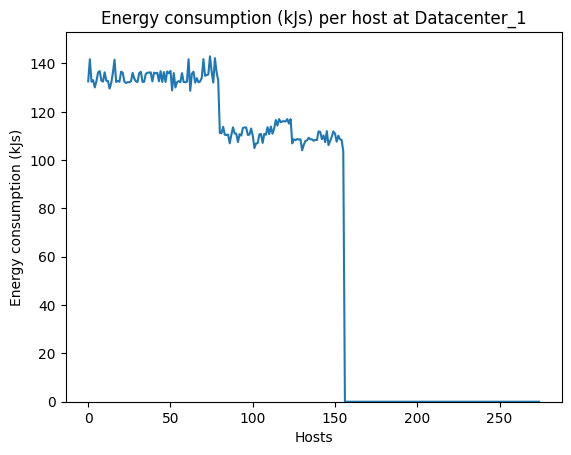

The datacenter 'Datacenter_2' current computing infrastructure is consuming 24.222572287334202 kilo joules per second.
With 9 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


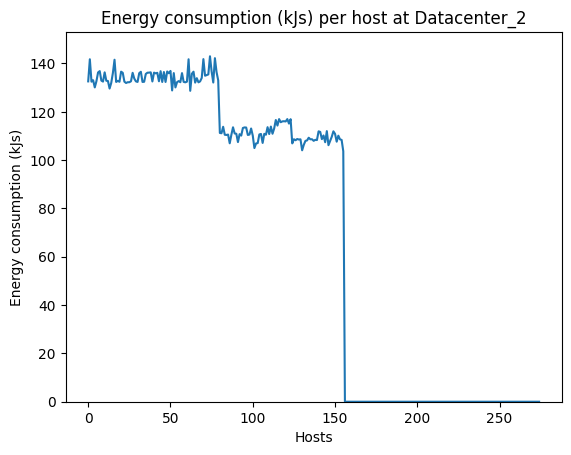

The datacenter 'Datacenter_3' current computing infrastructure is consuming 25.595318135942847 kilo joules per second.
With 7 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


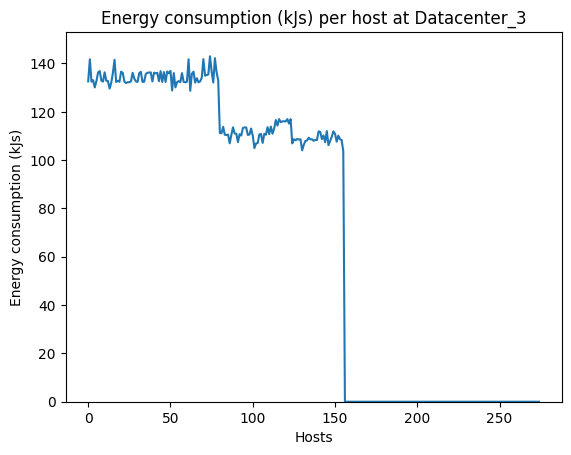

The datacenter 'Datacenter_4' current computing infrastructure is consuming 19.155724899519 kilo joules per second.
With 0 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


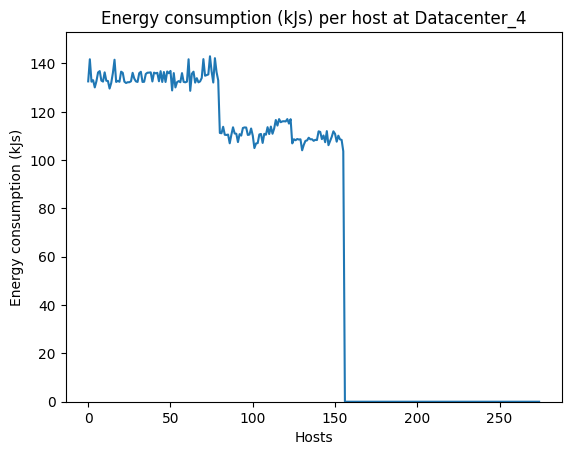

The cloud providers current computing infrastructure at max can consume 123.35721005354307 kilo joules per second.
With 31.0 hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.


In [73]:
labels= np.unique(dataset['datacenter_name'])

datacenter_combine_hosts_power = np.array([])
datacenter_combine_hosts_powered_on = np.array([])
datacenter_combine_hosts_powered_off = np.array([])

datacenter_combine_dvfs_cpu_cores = np.array([])
datacenter_combine_dvfs_cpu_cores_altered = np.array([])
datacenter_combine_dvfs_mode_changed = np.array([])

datacenter_combine_available_pes = np.array([])
datacenter_combine_available_mips = np.array([])
datacenter_combine_available_ram = np.array([])
datacenter_combine_available_bw = np.array([])
datacenter_combine_available_storage = np.array([])

datacenter_combine_available_power_aware_pes = np.array([])
datacenter_combine_available_power_aware_mips = np.array([])
datacenter_combine_available_power_aware_ram = np.array([])
datacenter_combine_available_power_aware_bw = np.array([])
datacenter_combine_available_power_aware_storage = np.array([])

for i in range(len(labels)):
    # power_per_datacenter = 0
    power = 0
    power_per_datacenter = np.array([])
    hosts_power_on = 0
    hosts_power_off = 0
    
    dvfs_mode_changed = 0
    dvfs_mode_altered = 0
    cpu_cores = 0
    
    pes = 0
    mips = 0
    ram = 0
    bw = 0
    storage = 0
    
    pes_power_aware = 0
    mips_power_aware = 0
    ram_power_aware = 0
    bw_power_aware = 0
    storage_power_aware = 0
    
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        
        power_model = sample['power_model'].split(",")
        # if sample['active'] == False:
        #         hosts_power_off += 1
        if sample['active'] == False or len(sample['vms'].split(":")) == 0 or (sample['available_mips'] == sample['mips'] and sample['available_ram'] == sample['ram'] and sample['available_bw'] == sample['bw']):
            hosts_power_off += 1
            
            pes += sample['available_pes']
            mips += sample['available_mips']
            ram += sample['available_ram']
            bw += sample['available_bw']
            storage += sample['available_storage']
        elif sample['dvfs_available']:
            hosts_power_on += 1
            frequency_range = sample['frequency_range'].split(",")
            voltage_range = sample['voltage_range'].split(",")
            cores = sample['utilization_per_pe'].split(":")
            mips_used = float(sample['mips']) - float(sample['available_mips'])
            
            frequency_index_per_core_indexes = []
            # print("Used MIPS per core:", cores)
            # print("Used MIPS:", mips_used)
            
            for core_index, mips_per_core in enumerate(cores):
                if mips_per_core != "":
                    cpu_cores += 1
                    mips_per_core_info = mips_per_core.split(",")
                    core_mips_used = float(mips_per_core_info[0]) - float(mips_per_core_info[1])
                    selected_frequency_index = 0
                    obj = {
                        "core_index": core_index,
                        "frequency_index": selected_frequency_index
                    }
                    
                    changed = False
                    for frequency_index, frequency in enumerate(frequency_range):
                        if frequency != "" and float(frequency) >= core_mips_used:
                            if frequency_index != 0:
                                dvfs_mode_changed += 1
                                
                                if changed == False:
                                    dvfs_mode_altered += 1
                                    changed = True
                            
                            selected_frequency_index = frequency_index
                    obj['frequency_index'] = selected_frequency_index
                    frequency_index_per_core_indexes.append(obj)
            
            
            utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
            if utilization % 0.1 == 0:
                host_power = float(power_model[utilization * 10])
                
                # P = c * v^2 * f
                host_cpu_capacitance = host_power / ((float(voltage_range[0]))**2 * float(frequency_range[0]))
                dvfs_host_power = host_cpu_capacitance * (float(voltage_range[selected_frequency_index]))**2 * float(frequency_range[selected_frequency_index])
                
                
                # power += host_power
                power += dvfs_host_power
                power_per_datacenter = np.append(power_per_datacenter, dvfs_host_power)
                
                pes += sample['available_pes']
                pes_power_aware += sample['available_pes']
                # mips += sample['available_mips']
                
                new_total_mips = 0
                for core in frequency_index_per_core_indexes:
                    new_total_mips += float(frequency_range[core['frequency_index']])
                    
                mips += new_total_mips - mips_used
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                mips_power_aware += new_total_mips - mips_used
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
            else:
                utilization_floor = int(math.floor(utilization * 10))
                utilization_ceil = int(math.ceil(utilization * 10))
                power_floor = float(power_model[utilization_floor])
                power_ceil = float(power_model[utilization_ceil])
                
                diff = (power_ceil - power_floor) / 10
                host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
                
                # P = c * v^2 * f
                host_cpu_capacitance = host_power / ((float(voltage_range[0]))**2 * float(frequency_range[0]))
                dvfs_host_power = host_cpu_capacitance * (float(voltage_range[selected_frequency_index]))**2 * float(frequency_range[selected_frequency_index])
                
                # power += host_power
                power += dvfs_host_power
                power_per_datacenter = np.append(power_per_datacenter, dvfs_host_power)
                
                pes += sample['available_pes']
                pes_power_aware += sample['available_pes']
                # mips += sample['available_mips']
                new_total_mips = 0
                for core in frequency_index_per_core_indexes:
                    new_total_mips += float(frequency_range[core['frequency_index']])
                    
                mips += new_total_mips - mips_used
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                mips_power_aware += new_total_mips - mips_used
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
        else:
            utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
            hosts_power_on += 1
            
            if utilization % 0.1 == 0:
                host_power = power_model[utilization * 10]
                hosts_power_on += 1
                power += host_power
                power_per_datacenter = np.append(power_per_datacenter, host_power)
                
                pes += sample['available_pes']
                mips += sample['available_mips']
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                pes_power_aware += sample['available_pes']
                mips_power_aware += sample['available_mips']
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
            else:
                utilization_floor = int(math.floor(utilization * 10))
                utilization_ceil = int(math.ceil(utilization * 10))
                power_floor = float(power_model[utilization_floor])
                power_ceil = float(power_model[utilization_ceil])
                
                diff = (power_ceil - power_floor) / 10
                host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
                
                power += host_power
                power_per_datacenter = np.append(power_per_datacenter, host_power)
                
                pes += sample['available_pes']
                mips += sample['available_mips']
                ram += sample['available_ram']
                bw += sample['available_bw']
                storage += sample['available_storage']
                
                pes_power_aware += sample['available_pes']
                mips_power_aware += sample['available_mips']
                ram_power_aware += sample['available_ram']
                bw_power_aware += sample['available_bw']
                storage_power_aware += sample['available_storage']
    
    datacenter_combine_dvfs_cpu_cores = np.append(datacenter_combine_dvfs_cpu_cores, cpu_cores)
    datacenter_combine_dvfs_mode_changed = np.append(datacenter_combine_dvfs_mode_changed, dvfs_mode_changed)
    datacenter_combine_dvfs_cpu_cores_altered = np.append(datacenter_combine_dvfs_cpu_cores_altered, dvfs_mode_altered)
    datacenter_combine_hosts_power = np.append(datacenter_combine_hosts_power, power)
    datacenter_combine_hosts_powered_on = np.append(datacenter_combine_hosts_powered_on, hosts_power_on)
    datacenter_combine_hosts_powered_off = np.append(datacenter_combine_hosts_powered_off, hosts_power_off)
    
    datacenter_combine_available_pes = np.append(datacenter_combine_available_pes, pes)
    datacenter_combine_available_mips = np.append(datacenter_combine_available_mips, mips)
    datacenter_combine_available_ram = np.append(datacenter_combine_available_ram, ram)
    datacenter_combine_available_bw = np.append(datacenter_combine_available_bw, bw)
    datacenter_combine_available_storage = np.append(datacenter_combine_available_storage, storage)
    
    datacenter_combine_available_power_aware_pes = np.append(datacenter_combine_available_power_aware_pes, pes_power_aware)
    datacenter_combine_available_power_aware_mips = np.append(datacenter_combine_available_power_aware_mips, mips_power_aware)
    datacenter_combine_available_power_aware_ram = np.append(datacenter_combine_available_power_aware_ram, ram_power_aware)
    datacenter_combine_available_power_aware_bw = np.append(datacenter_combine_available_power_aware_bw, bw_power_aware)
    datacenter_combine_available_power_aware_storage = np.append(datacenter_combine_available_power_aware_storage, storage_power_aware)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(np.sum(power_per_datacenter) * 1)/1000} kilo joules per second.")
    print(f"With {dvfs_mode_changed} hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.")
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (kJs)")
    plt.title(f"Energy consumption (kJs) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(datacenter_dvfs_hosts_power) * 1)/1000} kilo joules per second.")
print(f"With {np.sum(datacenter_dvfs_mode_changed)} hosts utilizing Dynamic Voltage Frequncy Scaling to reduce power consumption.")

Utilization

In [74]:
datacenter_used_combine_pes = np.subtract(datacenter_total_pes, datacenter_combine_available_pes)
datacenter_used_combine_mips = np.subtract(datacenter_total_mips, datacenter_combine_available_mips)
datacenter_used_combine_ram = np.subtract(datacenter_total_ram, datacenter_combine_available_ram)
datacenter_used_combine_bw = np.subtract(datacenter_total_bw, datacenter_combine_available_bw)
datacenter_used_combine_storage = np.subtract(datacenter_total_storage, datacenter_combine_available_storage)

print("Combined:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_combine_hosts_powered_on)} could be are powered on and {np.sum(datacenter_combine_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_combine_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_combine_dvfs_cpu_cores)} available cpu cores from hosts with DVFS available {np.sum(datacenter_combine_dvfs_cpu_cores_altered)} had their configuration altered, with the total configuration changes being {np.sum(datacenter_combine_dvfs_mode_changed)}. (percent: {(np.sum(datacenter_combine_dvfs_cpu_cores_altered)/np.sum(datacenter_combine_dvfs_cpu_cores))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_combine_pes)} are used. (percent: {((np.sum(datacenter_used_combine_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_combine_mips)} are used. (percent: {((np.sum(datacenter_used_combine_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_combine_ram)} are used. (percent: {((np.sum(datacenter_used_combine_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_combine_bw)} are used. (percent: {((np.sum(datacenter_used_combine_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_combine_storage)} are used. (percent: {((np.sum(datacenter_used_combine_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("Compared to:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_current_hosts_powered_on)} could be are powered on and {np.sum(datacenter_current_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_current_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_current_pes)} are used. (percent: {((np.sum(datacenter_used_current_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_current_mips)} are used. (percent: {((np.sum(datacenter_used_current_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_current_ram)} are used. (percent: {((np.sum(datacenter_used_current_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_current_bw)} are used. (percent: {((np.sum(datacenter_used_current_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_current_storage)} are used. (percent: {((np.sum(datacenter_used_current_storage))/np.sum(datacenter_total_storage))*100}%)")

Combined:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 380.0 available cpu cores from hosts with DVFS available 30.0 had their configuration altered, with the total configuration changes being 31.0. (percent: 7.894736842105263%)
Out of the 2360.0 available CPUs 1662.0 are used. (percent: 70.42372881355932%)
Out of the 5954400.0 available MIPS 3295725.4666677765 are used. (percent: 55.34941331902083%)
Out of the 5760000.0 available RAM 4633587.0 are used. (percent: 80.44421874999999%)
Out of the 10500000.0 available bandwidth 113862.0 are used. (percent: 1.0844%)
Out of the 153260000.0 available Storage 8634000.0 are used. (percent: 5.633563878376615%)

Compared to:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Out of the 5954400.0

In [75]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Combined:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_combine_hosts_powered_on[index]} could be are powered on and {datacenter_combine_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_combine_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_combine_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_combine_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_combine_dvfs_mode_changed[index]}. (percent: {(datacenter_combine_dvfs_cpu_cores_altered[index]/datacenter_combine_dvfs_cpu_cores[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_combine_pes[index]} are used. (percent: {((datacenter_used_combine_pes[index])/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_combine_mips[index]} are used. (percent: {((datacenter_used_combine_mips[index])/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_combine_ram[index]} are used. (percent: {((datacenter_used_combine_ram[index])/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_combine_bw[index]} are used. (percent: {((datacenter_used_combine_bw[index])/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_combine_storage[index]} are used. (percent: {((datacenter_used_combine_storage[index])/datacenter_total_storage[index])*100}%)")
    print()

    print("Compared to:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_current_hosts_powered_on[index]} could be are powered on and {datacenter_current_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_current_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_current_pes[index]} are used. (percent: {((datacenter_used_current_pes[index])/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_current_mips[index]} are used. (percent: {((datacenter_used_current_mips[index])/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_current_ram[index]} are used. (percent: {((datacenter_used_current_ram[index])/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_current_bw[index]} are used. (percent: {((datacenter_used_current_bw[index])/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_current_storage[index]} are used. (percent: {((datacenter_used_current_storage[index])/datacenter_total_storage[index])*100}%)")
    print()

---------- Datacenter_1 ----------
Combined:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 160.0 available cpu cores from hosts with DVFS available 14.0 had their configuration altered, with the total configuration changes being 15.0. (percent: 8.75%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1401612.1843490144 are used. (percent: 59.9184415333881%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)

Compared to:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS

/tmp/ipykernel_9638/1189482630.py:5: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Out of the {datacenter_combine_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_combine_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_combine_dvfs_mode_changed[index]}. (percent: {(datacenter_combine_dvfs_cpu_cores_altered[index]/datacenter_combine_dvfs_cpu_cores[index])*100}%)")


Taking into account power state

In [76]:
datacenter_used_or_unavailable_combine_pes = np.subtract(datacenter_total_pes, datacenter_combine_available_power_aware_pes)
datacenter_used_or_unavailable_combine_mips = np.subtract(datacenter_total_mips, datacenter_combine_available_power_aware_mips)
datacenter_used_or_unavailable_combine_ram = np.subtract(datacenter_total_ram, datacenter_combine_available_power_aware_ram)
datacenter_used_or_unavailable_combine_bw = np.subtract(datacenter_total_bw, datacenter_combine_available_power_aware_bw)
datacenter_used_or_unavailable_combine_storage = np.subtract(datacenter_total_storage, datacenter_combine_available_power_aware_storage)

print("Combined:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_combine_hosts_powered_on)} could be are powered on and {np.sum(datacenter_combine_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_combine_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_combine_dvfs_cpu_cores)} available cpu cores from hosts with DVFS available {np.sum(datacenter_combine_dvfs_cpu_cores_altered)} had their configuration altered, with the total configuration changes being {np.sum(datacenter_combine_dvfs_mode_changed)}. (percent: {(np.sum(datacenter_combine_dvfs_cpu_cores_altered)/np.sum(datacenter_combine_dvfs_cpu_cores))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_or_unavailable_combine_pes)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_combine_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_or_unavailable_combine_mips)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_combine_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_or_unavailable_combine_ram)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_combine_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_or_unavailable_combine_bw)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_combine_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_or_unavailable_combine_storage)} are used. (percent: {((np.sum(datacenter_used_or_unavailable_combine_storage))/np.sum(datacenter_total_storage))*100}%)")
print()

print("Compared to:")
print(f"Out of the {np.sum(datacenter_hosts)} available hosts {np.sum(datacenter_current_hosts_powered_on)} could be are powered on and {np.sum(datacenter_current_hosts_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_current_hosts_powered_on)/np.sum(datacenter_hosts))*100}%)")
print(f"Out of the {np.sum(datacenter_total_pes)} available CPUs {np.sum(datacenter_used_current_pes)} are used. (percent: {((np.sum(datacenter_used_current_pes))/np.sum(datacenter_total_pes))*100}%)")
print(f"Out of the {np.sum(datacenter_total_mips)} available MIPS {np.sum(datacenter_used_current_mips)} are used. (percent: {((np.sum(datacenter_used_current_mips))/np.sum(datacenter_total_mips))*100}%)")
print(f"Out of the {np.sum(datacenter_total_ram)} available RAM {np.sum(datacenter_used_current_ram)} are used. (percent: {((np.sum(datacenter_used_current_ram))/np.sum(datacenter_total_ram))*100}%)")
print(f"Out of the {np.sum(datacenter_total_bw)} available bandwidth {np.sum(datacenter_used_current_bw)} are used. (percent: {((np.sum(datacenter_used_current_bw))/np.sum(datacenter_total_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage)} available Storage {np.sum(datacenter_used_current_storage)} are used. (percent: {((np.sum(datacenter_used_current_storage))/np.sum(datacenter_total_storage))*100}%)")

Combined:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 380.0 available cpu cores from hosts with DVFS available 30.0 had their configuration altered, with the total configuration changes being 31.0. (percent: 7.894736842105263%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Out of the 5954400.0 available MIPS 4084205.4666677765 are used. (percent: 68.59138564200887%)
Out of the 5760000.0 available RAM 5529587.0 are used. (percent: 95.99977430555555%)
Out of the 10500000.0 available bandwidth 1303862.0 are used. (percent: 12.417733333333333%)
Out of the 153260000.0 available Storage 23894000.0 are used. (percent: 15.59049980425421%)

Compared to:
Out of the 1050.0 available hosts 931.0 could be are powered on and 119.0 hosts could powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1970.0 are used. (percent: 83.47457627118644%)
Out of

In [77]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Combined:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_combine_hosts_powered_on[index]} could be are powered on and {datacenter_combine_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_combine_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_combine_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_combine_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_combine_dvfs_mode_changed[index]}. (percent: {(datacenter_combine_dvfs_cpu_cores_altered[index]/datacenter_combine_dvfs_cpu_cores[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_or_unavailable_combine_pes[index]} are used. (percent: {((datacenter_used_or_unavailable_combine_pes[index])/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_or_unavailable_combine_mips[index]} are used. (percent: {((datacenter_used_or_unavailable_combine_mips[index])/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_or_unavailable_combine_ram[index]} are used. (percent: {((datacenter_used_or_unavailable_combine_ram[index])/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_or_unavailable_combine_bw[index]} are used. (percent: {((datacenter_used_or_unavailable_combine_bw[index])/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_or_unavailable_combine_storage[index]} are used. (percent: {((datacenter_used_or_unavailable_combine_storage[index])/datacenter_total_storage[index])*100}%)")
    print()

    print("Compared to:")
    print(f"Out of the {datacenter_hosts[index]} available hosts {datacenter_current_hosts_powered_on[index]} could be are powered on and {datacenter_current_hosts_powered_off[index]} hosts could powered down. (percent: {(datacenter_current_hosts_powered_on[index]/datacenter_hosts[index])*100}%)")
    print(f"Out of the {datacenter_total_pes[index]} available CPUs {datacenter_used_current_pes[index]} are used. (percent: {((datacenter_used_current_pes[index])/datacenter_total_pes[index])*100}%)")
    print(f"Out of the {datacenter_total_mips[index]} available MIPS {datacenter_used_current_mips[index]} are used. (percent: {((datacenter_used_current_mips[index])/datacenter_total_mips[index])*100}%)")
    print(f"Out of the {datacenter_total_ram[index]} available RAM {datacenter_used_current_ram[index]} are used. (percent: {((datacenter_used_current_ram[index])/datacenter_total_ram[index])*100}%)")
    print(f"Out of the {datacenter_total_bw[index]} available bandwidth {datacenter_used_current_bw[index]} are used. (percent: {((datacenter_used_current_bw[index])/datacenter_total_bw[index])*100}%)")
    print(f"Out of the {datacenter_total_storage[index]} available Storage {datacenter_used_current_storage[index]} are used. (percent: {((datacenter_used_current_storage[index])/datacenter_total_storage[index])*100}%)")
    print()

---------- Datacenter_1 ----------
Combined:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 160.0 available cpu cores from hosts with DVFS available 14.0 had their configuration altered, with the total configuration changes being 15.0. (percent: 8.75%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1401612.1843490144 are used. (percent: 59.9184415333881%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)

Compared to:
Out of the 400.0 available hosts 400.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS

/tmp/ipykernel_9638/102680235.py:5: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Out of the {datacenter_combine_dvfs_cpu_cores[index]} available cpu cores from hosts with DVFS available {datacenter_combine_dvfs_cpu_cores_altered[index]} had their configuration altered, with the total configuration changes being {datacenter_combine_dvfs_mode_changed[index]}. (percent: {(datacenter_combine_dvfs_cpu_cores_altered[index]/datacenter_combine_dvfs_cpu_cores[index])*100}%)")


Power

In [78]:
print("Combined:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_combine_hosts_power)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_combine_hosts_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_combine_hosts_power) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_combine_hosts_power)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_combine_hosts_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(datacenter_combine_hosts_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_combine_hosts_power) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(datacenter_combine_hosts_power)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print()

print("Compared to:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_current_power)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_current_power) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_current_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(datacenter_current_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_current_power) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(datacenter_current_power)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")

Combined:
The maximum power consumption for the cloud provider is 161320.0W
The current power consumption for the cloud provider is 123357.21005354307W
The cloud provider is saving 37962.789946456935W
The cloud provider is thus using 76.4674002315541% of their full power consumption.
The cloud provider is thus using 23.532599768445905% of their full power consumption.

The maximum energy consumption for the cloud provider is 161.32kJ/s
The current energy consumption for the cloud provider is 123.35721005354307kJ/s
The cloud provider is saving 37.96278994645692kJ/s
The cloud provider is thus using 76.46740023155411% of their full energy consumption (kJ/s).
The cloud provider is saving 23.53259976844591% energy (kJ/s).

Compared to:
The maximum power consumption for the cloud provider is 161320.0W
The current power consumption for the cloud provider is 124468.8033788402W
The cloud provider is saving 36851.196621159805W
The cloud provider is thus using 77.15646130600061% of their full pow

In [79]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print("Combined:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_combine_hosts_power[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter[index] - datacenter_combine_hosts_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_combine_hosts_power[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter[index] - datacenter_combine_hosts_power[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_combine_hosts_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((datacenter_combine_hosts_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_combine_hosts_power[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter[index] - datacenter_combine_hosts_power[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    print()

    print("Compared to:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_current_power[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter[index] - datacenter_current_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_current_power[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter[index] - datacenter_current_power[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_current_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((datacenter_current_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_current_power[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter[index] - datacenter_current_power[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
Combined:
The maximum power consumption for the cloud provider is 63960.0W
The current power consumption for the cloud provider is 54383.594730747005W
The cloud provider is saving 9576.405269252995W
The cloud provider is thus using 85.02750895989213% of their full power consumption.
The cloud provider is thus using 14.972491040107872% of their full power consumption.

The maximum energy consumption for the cloud provider is 63.96kJ/s
The current energy consumption for the cloud provider is 54.38359473074701kJ/s
The cloud provider is saving 9.576405269252994kJ/s
The cloud provider is thus using 85.02750895989213% of their full energy consumption (kJ/s).
The cloud provider is saving 14.972491040107872% energy (kJ/s).


Compared to:
The maximum power consumption for the cloud provider is 63960.0W
The current power consumption for the cloud provider is 54919.26502273205W
The cloud provider is saving 9040.734977267952W
The cloud provider is thus using 85.8

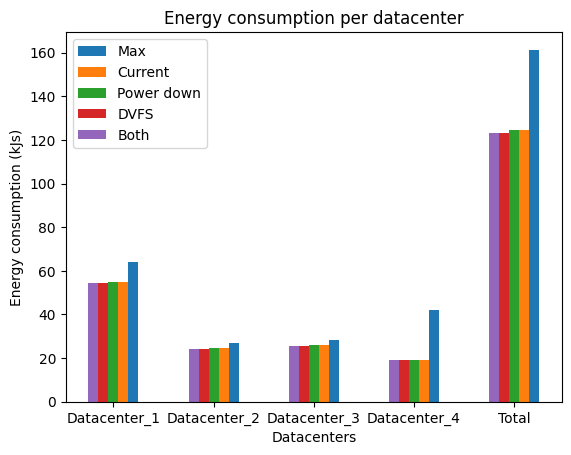

In [80]:
bar_width = 0.1
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width * 2, (np.append(max_power_per_datacenter, np.sum(max_power_per_datacenter)) * 1) / 1000, bar_width, label="Max")
plt.bar(x + bar_width, (np.append(datacenter_current_power, np.sum(datacenter_current_power)) * 1) / 1000, bar_width, label="Current")
plt.bar(x, (np.append(min_host_power_per_datacenter, np.sum(min_host_power_per_datacenter)) * 1) / 1000, bar_width, label="Power down")
plt.bar(x - bar_width , (np.append(datacenter_dvfs_hosts_power, np.sum(datacenter_dvfs_hosts_power)) * 1) / 1000, bar_width, label="DVFS")
plt.bar(x - bar_width * 2, (np.append(datacenter_combine_hosts_power, np.sum(datacenter_combine_hosts_power)) * 1) / 1000, bar_width, label="Both")
plt.xticks(x, np.append(labels, "Total"))
# plt.figure(figsize=(15,10))
plt.xlabel("Datacenters")
plt.ylabel("Energy consumption (kJs)")
plt.title("Energy consumption per datacenter")
plt.legend()
plt.show()


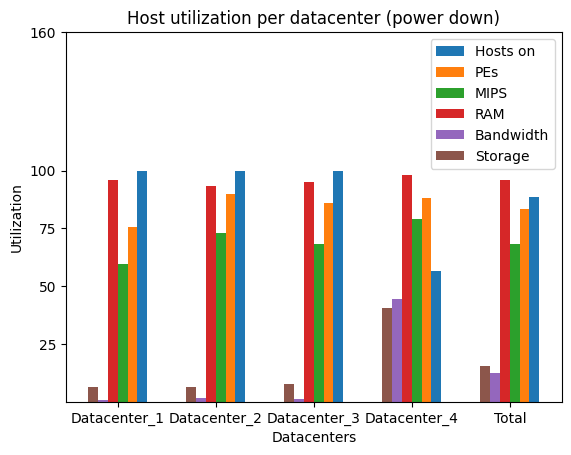

/tmp/ipykernel_9638/1429094749.py:20: RuntimeWarning: invalid value encountered in divide
  plt.bar(x + bar_width * 2, (np.append(datacenter_dvfs_cpu_cores_altered, np.sum(datacenter_dvfs_cpu_cores_altered)) * 100) / np.append(datacenter_dvfs_cpu_cores, np.sum(datacenter_dvfs_cpu_cores)), bar_width, label="Core alteration")


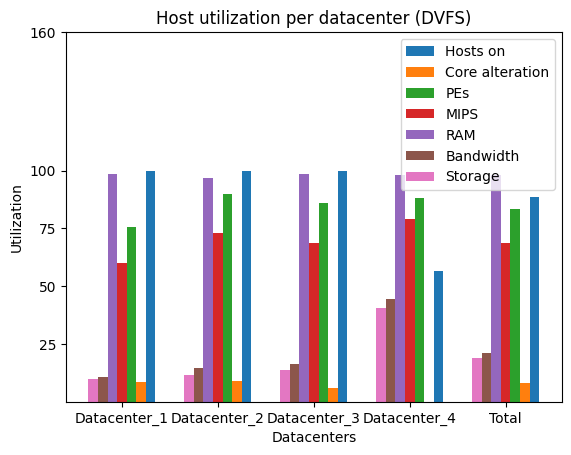

/tmp/ipykernel_9638/1429094749.py:35: RuntimeWarning: invalid value encountered in divide
  plt.bar(x + bar_width * 2, (np.append(datacenter_combine_dvfs_cpu_cores_altered, np.sum(datacenter_combine_dvfs_cpu_cores_altered)) * 100) / np.append(datacenter_combine_dvfs_cpu_cores, np.sum(datacenter_combine_dvfs_cpu_cores)), bar_width, label="Core alteration")


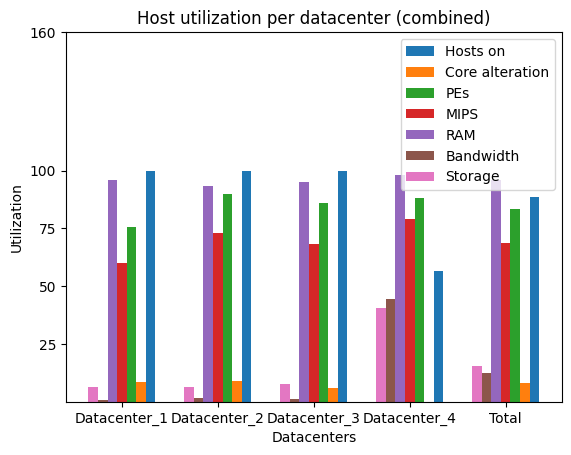

In [81]:
bar_width = 0.1
x = np.arange(len(labels) + 1)

plt.bar(x + (bar_width / 2) * 5, (np.append(datacenter_hosts_powered_on, np.sum(datacenter_hosts_powered_on)) * 100) / np.append(datacenter_hosts, np.sum(datacenter_hosts)), bar_width, label="Hosts on")
# plt.bar(x + bar_width * 2, (np.append(datacenter_power_down_hosts_dvfs_cpu_cores_altered, np.sum(datacenter_power_down_hosts_dvfs_cpu_cores_altered)) * 100) / np.append(datacenter_power_down_hosts_dvfs_cpu_cores, np.sum(datacenter_power_down_hosts_dvfs_cpu_cores)), bar_width, label="Core alteration")
plt.bar(x + (bar_width / 2) * 3, (np.append(datacenter_used_or_unavailable_power_down_hosts_pes, np.sum(datacenter_used_or_unavailable_power_down_hosts_pes)) * 100) / np.append(datacenter_total_pes, np.sum(datacenter_total_pes)), bar_width, label="PEs")
plt.bar(x + (bar_width / 2), (np.append(datacenter_used_or_unavailable_power_down_hosts_mips, np.sum(datacenter_used_or_unavailable_power_down_hosts_mips)) * 100) / np.append(datacenter_total_mips, np.sum(datacenter_total_mips)), bar_width, label="MIPS")
plt.bar(x - (bar_width / 2), (np.append(datacenter_used_or_unavailable_power_down_hosts_ram, np.sum(datacenter_used_or_unavailable_power_down_hosts_ram)) * 100) / np.append(datacenter_total_ram, np.sum(datacenter_total_ram)), bar_width, label="RAM")
plt.bar(x - (bar_width / 2) * 3, (np.append(datacenter_used_or_unavailable_power_down_hosts_bw, np.sum(datacenter_used_or_unavailable_power_down_hosts_bw)) * 100) / np.append(datacenter_total_bw, np.sum(datacenter_total_bw)), bar_width, label="Bandwidth")
plt.bar(x - (bar_width / 2) * 5, (np.append(datacenter_used_or_unavailable_power_down_hosts_storage, np.sum(datacenter_used_or_unavailable_power_down_hosts_storage)) * 100) / np.append(datacenter_total_storage, np.sum(datacenter_total_storage)), bar_width, label="Storage")
plt.xticks(x, np.append(labels, "Total"))
plt.yticks([25, 50, 75, 100, 160])
plt.xlabel("Datacenters")
plt.ylabel("Utilization")
plt.title("Host utilization per datacenter (power down)")
plt.legend()
plt.show()

plt.bar(x + bar_width * 3, (np.append(datacenter_dvfs_hosts_powered_on, np.sum(datacenter_dvfs_hosts_powered_on)) * 100) / np.append(datacenter_hosts, np.sum(datacenter_hosts)), bar_width, label="Hosts on")
plt.bar(x + bar_width * 2, (np.append(datacenter_dvfs_cpu_cores_altered, np.sum(datacenter_dvfs_cpu_cores_altered)) * 100) / np.append(datacenter_dvfs_cpu_cores, np.sum(datacenter_dvfs_cpu_cores)), bar_width, label="Core alteration")
plt.bar(x + bar_width, (np.append(datacenter_used_or_unavailable_dvfs_pes, np.sum(datacenter_used_or_unavailable_dvfs_pes)) * 100) / np.append(datacenter_total_pes, np.sum(datacenter_total_pes)), bar_width, label="PEs")
plt.bar(x, (np.append(datacenter_used_or_unavailable_dvfs_mips, np.sum(datacenter_used_or_unavailable_dvfs_mips)) * 100) / np.append(datacenter_total_mips, np.sum(datacenter_total_mips)), bar_width, label="MIPS")
plt.bar(x - bar_width, (np.append(datacenter_used_or_unavailable_dvfs_ram, np.sum(datacenter_used_or_unavailable_dvfs_ram)) * 100) / np.append(datacenter_total_ram, np.sum(datacenter_total_ram)), bar_width, label="RAM")
plt.bar(x - bar_width * 2, (np.append(datacenter_used_or_unavailable_dvfs_bw, np.sum(datacenter_used_or_unavailable_dvfs_bw)) * 100) / np.append(datacenter_total_bw, np.sum(datacenter_total_bw)), bar_width, label="Bandwidth")
plt.bar(x - bar_width * 3, (np.append(datacenter_used_or_unavailable_dvfs_storage, np.sum(datacenter_used_or_unavailable_dvfs_storage)) * 100) / np.append(datacenter_total_storage, np.sum(datacenter_total_storage)), bar_width, label="Storage")
plt.xticks(x, np.append(labels, "Total"))
plt.yticks([25, 50, 75, 100, 160])
plt.xlabel("Datacenters")
plt.ylabel("Utilization")
plt.title("Host utilization per datacenter (DVFS)")
plt.legend()
plt.show()

plt.bar(x + bar_width * 3, (np.append(datacenter_combine_hosts_powered_on, np.sum(datacenter_combine_hosts_powered_on)) * 100) / np.append(datacenter_hosts, np.sum(datacenter_hosts)), bar_width, label="Hosts on")
plt.bar(x + bar_width * 2, (np.append(datacenter_combine_dvfs_cpu_cores_altered, np.sum(datacenter_combine_dvfs_cpu_cores_altered)) * 100) / np.append(datacenter_combine_dvfs_cpu_cores, np.sum(datacenter_combine_dvfs_cpu_cores)), bar_width, label="Core alteration")
plt.bar(x + bar_width, (np.append(datacenter_used_or_unavailable_combine_pes, np.sum(datacenter_used_or_unavailable_combine_pes)) * 100) / np.append(datacenter_total_pes, np.sum(datacenter_total_pes)), bar_width, label="PEs")
plt.bar(x, (np.append(datacenter_used_or_unavailable_combine_mips, np.sum(datacenter_used_or_unavailable_combine_mips)) * 100) / np.append(datacenter_total_mips, np.sum(datacenter_total_mips)), bar_width, label="MIPS")
plt.bar(x - bar_width, (np.append(datacenter_used_or_unavailable_combine_ram, np.sum(datacenter_used_or_unavailable_combine_ram)) * 100) / np.append(datacenter_total_ram, np.sum(datacenter_total_ram)), bar_width, label="RAM")
plt.bar(x - bar_width * 2, (np.append(datacenter_used_or_unavailable_combine_bw, np.sum(datacenter_used_or_unavailable_combine_bw)) * 100) / np.append(datacenter_total_bw, np.sum(datacenter_total_bw)), bar_width, label="Bandwidth")
plt.bar(x - bar_width * 3, (np.append(datacenter_used_or_unavailable_combine_storage, np.sum(datacenter_used_or_unavailable_combine_storage)) * 100) / np.append(datacenter_total_storage, np.sum(datacenter_total_storage)), bar_width, label="Storage")
plt.xticks(x, np.append(labels, "Total"))
plt.yticks([25, 50, 75, 100, 160])
plt.xlabel("Datacenters")
plt.ylabel("Utilization")
plt.title("Host utilization per datacenter (combined)")
plt.legend()
plt.show()

### Power over 24 hours

#### PD

In [82]:
print(f"The maximum power consumption for the cloud provider is {(np.sum(max_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption for the cloud provider is {(np.sum(min_host_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption each hour for the cloud provider is {(np.sum(min_host_power_per_datacenter)*60*60) / 1000}kWh")
print(f"The cloud provider is saving {(np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(min_host_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The cloud provider is saving per hour {(np.sum(max_power_per_datacenter)*60*60)/1000 - (np.sum(min_host_power_per_datacenter)*60*60)/1000}kWh")
print(f"The cloud provider is thus using {((np.sum(min_host_power_per_datacenter)*24*60*60)/1000 / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% of their full power consumption.")
print(f"The data center is saving {((((np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(min_host_power_per_datacenter)*24*60*60)/1000)) / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% power (kWh).")

The maximum power consumption for the cloud provider is 13938048.0kW
The current power consumption for the cloud provider is 10754104.611931792kW
The current power consumption each hour for the cloud provider is 448087.6921638247kWh
The cloud provider is saving 3183943.3880682085kW
The cloud provider is saving per hour 132664.3078361753kWh
The cloud provider is thus using 7.71564613060006e-05% of their full power consumption.
The data center is saving 2.2843538693999393e-05% power (kWh).


In [83]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(max_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(min_host_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(min_host_power_per_datacenter[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(max_power_per_datacenter[index]*24*60*60) / 1000 - (min_host_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(max_power_per_datacenter[index]*60*60) / 1000 - (min_host_power_per_datacenter[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((min_host_power_per_datacenter[index]*24*60*60) / 1000 / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((max_power_per_datacenter[index]*24*60*60) / 1000 - (min_host_power_per_datacenter[index]*24*60*60) / 1000) / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 5526144.0kW
The current power consumption for the data center is 4745024.49796405kW
The current power consumption each hour for the cloud provider is 197709.35408183536kWh
The data center is saving 781119.5020359503kW
The data center is saving per hour 32546.645918164635kWh
The data center is thus using 8.586501723378996e-05% of their full power consumption.
The data center is saving 1.4134982766210041e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 2309472.0kW
The current power consumption for the data center is 2120809.7397851977kW
The current power consumption each hour for the cloud provider is 88367.07249104988kWh
The data center is saving 188662.26021480234kW
The data center is saving per hour 7860.927508950117kWh
The data center is thus using 9.183093537333198e-05% of their full power consumption.
The data center is saving 8.169064

#### DVFS

In [84]:
print(f"The maximum power consumption for the cloud provider is {(np.sum(max_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption for the cloud provider is {(np.sum(datacenter_dvfs_hosts_power)*24*60*60)/1000}kW")
print(f"The current power consumption each hour for the cloud provider is {(np.sum(datacenter_dvfs_hosts_power)*60*60) / 1000}kWh")
print(f"The cloud provider is saving {(np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_dvfs_hosts_power)*24*60*60)/1000}kW")
print(f"The cloud provider is saving per hour {(np.sum(max_power_per_datacenter)*60*60)/1000 - (np.sum(datacenter_dvfs_hosts_power)*60*60)/1000}kWh")
print(f"The cloud provider is thus using {((np.sum(datacenter_dvfs_hosts_power)*24*60*60)/1000 / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% of their full power consumption.")
print(f"The data center is saving {((((np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_dvfs_hosts_power)*24*60*60)/1000)) / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% power (kWh).")

The maximum power consumption for the cloud provider is 13938048.0kW
The current power consumption for the cloud provider is 10658062.948626122kW
The current power consumption each hour for the cloud provider is 444085.956192755kWh
The cloud provider is saving 3279985.0513738785kW
The cloud provider is saving per hour 136666.04380724498kWh
The cloud provider is thus using 7.64674002315541e-05% of their full power consumption.
The data center is saving 2.35325997684459e-05% power (kWh).


In [85]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(max_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_dvfs_hosts_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_dvfs_hosts_power[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_dvfs_hosts_power[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(max_power_per_datacenter[index]*60*60) / 1000 - (datacenter_dvfs_hosts_power[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_dvfs_hosts_power[index]*24*60*60) / 1000 / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_dvfs_hosts_power[index]*24*60*60) / 1000) / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 5526144.0kW
The current power consumption for the data center is 4698742.584736542kW
The current power consumption each hour for the cloud provider is 195780.94103068922kWh
The data center is saving 827401.4152634582kW
The data center is saving per hour 34475.058969310776kWh
The data center is thus using 8.502750895989215e-05% of their full power consumption.
The data center is saving 1.4972491040107862e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 2309472.0kW
The current power consumption for the data center is 2092830.2456256754kW
The current power consumption each hour for the cloud provider is 87201.26023440315kWh
The data center is saving 216641.75437432458kW
The data center is saving per hour 9026.739765596853kWh
The data center is thus using 9.061942494326304e-05% of their full power consumption.
The data center is saving 9.38057

#### PD + DVFS

In [86]:
print(f"The maximum power consumption for the cloud provider is {(np.sum(max_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption for the cloud provider is {(np.sum(datacenter_combine_hosts_power)*24*60*60)/1000}kW")
print(f"The current power consumption each hour for the cloud provider is {(np.sum(datacenter_combine_hosts_power)*60*60) / 1000}kWh")
print(f"The cloud provider is saving {(np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_combine_hosts_power)*24*60*60)/1000}kW")
print(f"The cloud provider is saving per hour {(np.sum(max_power_per_datacenter)*60*60)/1000 - (np.sum(datacenter_combine_hosts_power)*60*60)/1000}kWh")
print(f"The cloud provider is thus using {((np.sum(datacenter_combine_hosts_power)*24*60*60)/1000 / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% of their full power consumption.")
print(f"The data center is saving {((((np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_combine_hosts_power)*24*60*60)/1000)) / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% power (kWh).")

The maximum power consumption for the cloud provider is 13938048.0kW
The current power consumption for the cloud provider is 10658062.948626122kW
The current power consumption each hour for the cloud provider is 444085.956192755kWh
The cloud provider is saving 3279985.0513738785kW
The cloud provider is saving per hour 136666.04380724498kWh
The cloud provider is thus using 7.64674002315541e-05% of their full power consumption.
The data center is saving 2.35325997684459e-05% power (kWh).


In [87]:
for index in range(len(datacenter_hosts)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(max_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_combine_hosts_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_combine_hosts_power[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_combine_hosts_power[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(max_power_per_datacenter[index]*60*60) / 1000 - (datacenter_combine_hosts_power[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_combine_hosts_power[index]*24*60*60) / 1000 / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_combine_hosts_power[index]*24*60*60) / 1000) / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 5526144.0kW
The current power consumption for the data center is 4698742.584736542kW
The current power consumption each hour for the cloud provider is 195780.94103068922kWh
The data center is saving 827401.4152634582kW
The data center is saving per hour 34475.058969310776kWh
The data center is thus using 8.502750895989215e-05% of their full power consumption.
The data center is saving 1.4972491040107862e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 2309472.0kW
The current power consumption for the data center is 2092830.2456256754kW
The current power consumption each hour for the cloud provider is 87201.26023440315kWh
The data center is saving 216641.75437432458kW
The data center is saving per hour 9026.739765596853kWh
The data center is thus using 9.061942494326304e-05% of their full power consumption.
The data center is saving 9.38057